##### BAF 신입세션 3주차 과제_심고은

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'  #선명하게 만들기

In [312]:
#pip install missingno

In [313]:
#pip install fancyimpute

In [4]:
# 결측치 확인하는 라이브러리
import missingno as msno 

# 다중대체 라이브러리
from fancyimpute import IterativeImputer

# seaborn의 다른 라이브러리
import seaborn.objects as so

# Warning 메세지를 뜨지 않게 해줌
import warnings
warnings.filterwarnings('ignore')

In [30]:
data = pd.read_csv('C:/Users/sim/Desktop/BAF/Dataset/SeoulBikeData_NaN.csv')
df=data.copy()

In [10]:
data.head() 

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [11]:
data.tail()

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,NaN,No Holiday,Yes
8756,8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [13]:
data.info() #Temperature, Wind speed, Seasons마다 876개의 결측치 존재 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8760 non-null   int64  
 1   Date                       8760 non-null   object 
 2   Rented Bike Count          8760 non-null   int64  
 3   Hour                       8760 non-null   int64  
 4   Temperature(°C)            7884 non-null   float64
 5   Humidity(%)                8760 non-null   int64  
 6   Wind speed (m/s)           7884 non-null   float64
 7   Visibility (10m)           8760 non-null   int64  
 8   Dew point temperature(°C)  8760 non-null   float64
 9   Solar Radiation (MJ/m2)    8760 non-null   float64
 10  Rainfall(mm)               8760 non-null   float64
 11  Snowfall (cm)              8760 non-null   float64
 12  Seasons                    7884 non-null   object 
 13  Holiday                    8760 non-null   objec

In [14]:
data.isna().sum(axis=0).sort_values() #결측치 재확인 >> Temperature, Wind speed, Seasons마다 876개의 결측치

Unnamed: 0                     0
Date                           0
Rented Bike Count              0
Hour                           0
Humidity(%)                    0
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Holiday                        0
Functioning Day                0
Temperature(°C)              876
Wind speed (m/s)             876
Seasons                      876
dtype: int64

In [15]:
data.describe() #기술통계량 확인

,Unnamed: 0,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,7884.000000,8760.000000,7884.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,4379.500000,704.602055,11.500000,13.026370,58.226256,1.727220,1436.825799,4.073813,0.569111,0.148687,0.075068
std,2528.938512,644.997468,6.922582,11.936017,20.362413,1.036138,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,2189.750000,191.000000,5.750000,3.600000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,4379.500000,504.500000,11.500000,13.950000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,6569.250000,1065.250000,17.250000,22.600000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,8759.000000,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [16]:
data[data.duplicated()] #중복행 확인

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


<Axes: >

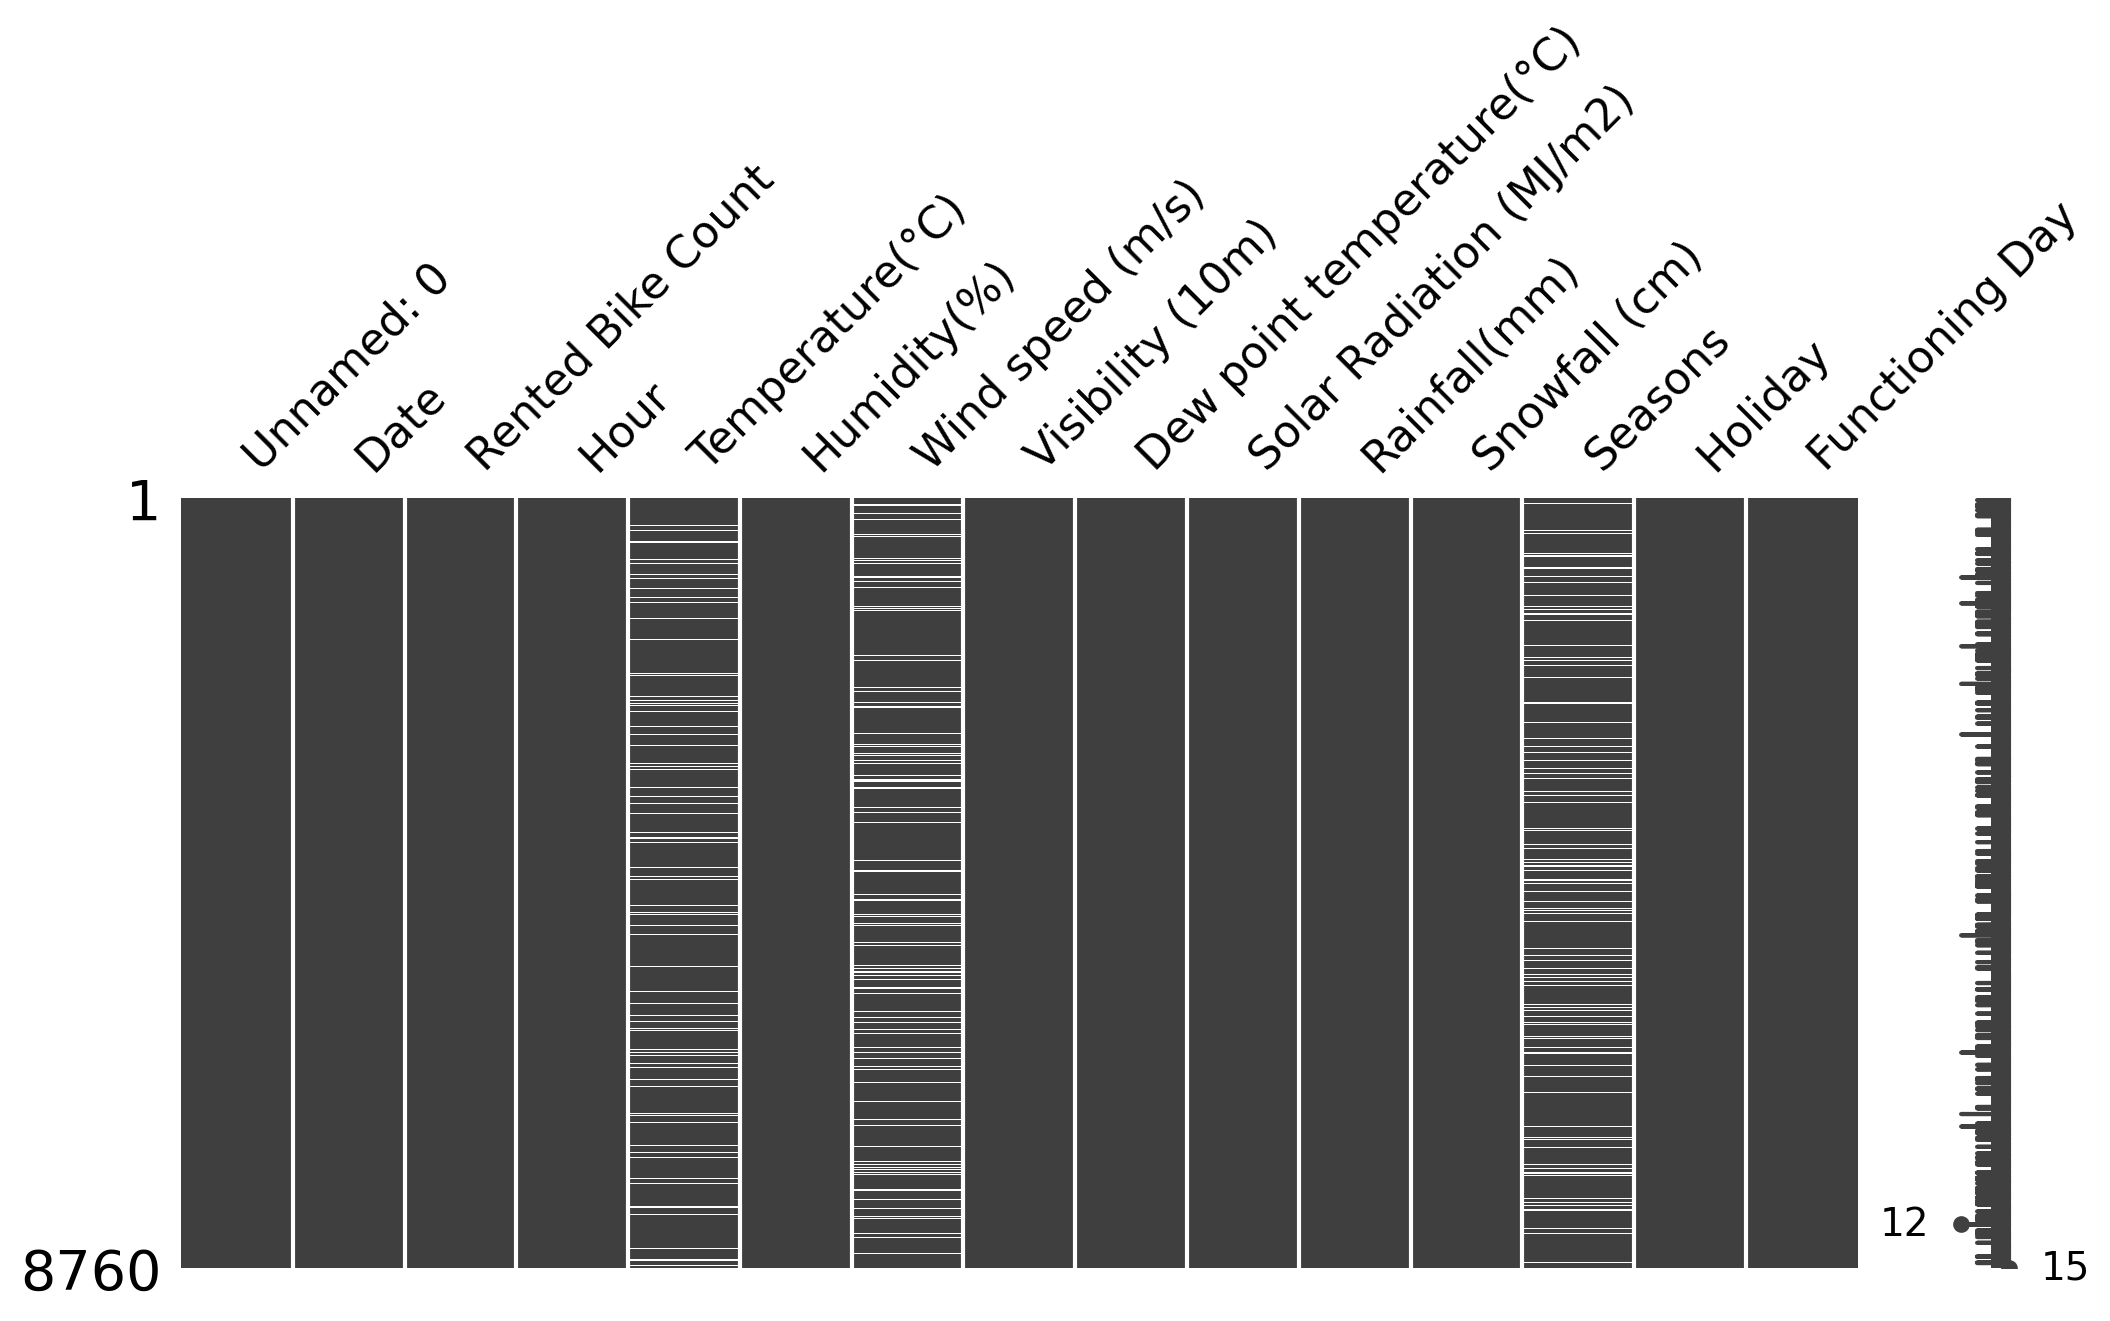

In [18]:
msno.matrix(df, figsize=(12,5))

# 결측치 제거

In [22]:
df.dropna() #인덱스 방향으로 nan이 하나라도 있으면 해당 행을 삭제함.

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
5,5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.0,0.0,0.0,Winter,No Holiday,Yes
7,7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,8754,30/11/2018,1384,18,4.7,34,1.9,1661,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [24]:
df.dropna(subset=['Temperature(°C)']) #Temperature(°C)가 nan인 행을 삭제함.

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,NaN,No Holiday,Yes
8756,8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [25]:
df.dropna(subset=['Wind speed (m/s)']) #Wind speed (m/s)가 nan인 행을 삭제함.

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
5,5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,NaN,No Holiday,Yes
8756,8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [26]:
df.dropna(subset=['Seasons']) #Seasons가 nan인 행을 삭제함.

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
5,5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,8754,30/11/2018,1384,18,4.7,34,1.9,1661,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


# 결측치 대체
## 단일대체법
### 평균, 중앙값, 최빈값

In [59]:
df2=df.copy()
df2

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,NaN,No Holiday,Yes
8756,8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [105]:
# 선택하여 열 이름 변경하기
df.rename(columns={'Temperature(°C)':'Temperature'}, inplace=True)
df.rename(columns={'Humidity(%)':'Humidity'}, inplace=True)
df.rename(columns={'Wind speed (m/s)':'Wind speed'}, inplace=True)
df.rename(columns={'Visibility (10m)':'Visibility'}, inplace=True)
df.rename(columns={'Dew point temperature(°C)':'Dew point temperature'}, inplace=True)
df.rename(columns={'Solar Radiation (MJ/m2)':'Solar Radiation'}, inplace=True)
df.rename(columns={'Rainfall(mm)':'Rainfall'}, inplace=True)
df.rename(columns={'Snowfall (cm)':'Snowfall'}, inplace=True)   
df

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,NaN,No Holiday,Yes
8756,8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


## 단일대체법
### 평균, 중앙값, 최빈값
#### 1. 온도(Temperature)

In [61]:
print(f'평균: {round(df.Temperature.mean())}')
print(f'중앙값: {df.Temperature.median()}')
print(f'최빈값: {df.Temperature.mode()[0]}') # 최빈값의 경우 여러개일 경우 여러개를 반환하기 때문에 indexing이 필요함.

평균: 13
중앙값: 13.95
최빈값: 20.5


In [62]:
df2.Temperature=df.Temperature.fillna(round(df.Temperature.mean()))

In [63]:
print(f'대체 전: {df.Temperature.isna().sum()}')
print(f'대체 후: {df2.Temperature.isna().sum()}')

대체 전: 876
대체 후: 0


In [64]:
print(f'평균: {round(df2.Temperature.mean())}')
print(f'중앙값: {df2.Temperature.median()}')
print(f'최빈값: {df2.Temperature.mode()[0]}')

평균: 13
중앙값: 13.0
최빈값: 13.0


In [65]:
print(f'대체 전: {df.Temperature.std()}')
print(f'대체 후: {df2.Temperature.std()}')

대체 전: 11.93601661646215
대체 후: 11.323430551458275


### 다른 변수의 그룹별 대표값

In [72]:
df2.Temperature=df.groupby(['Humidity', 'Dew point temperature'])['Temperature'].transform(lambda x: x.fillna(x.median()))

In [74]:
print(f'대체 전: {df.Temperature.isna().sum()}')
print(f'대체 후: {df2.Temperature.isna().sum()}')

대체 전: 876
대체 후: 640


In [75]:
df2.Temperature=df2.Temperature.fillna(round(df2.Temperature.mean()))

In [76]:
print(f'대체 후: {df2.Temperature.isna().sum()}')

대체 후: 0


In [77]:
print(f'평균: {round(df2.Temperature.mean())}')
print(f'중앙값: {df2.Temperature.median()}')
print(f'최빈값: {df2.Temperature.mode()[0]}')

평균: 13
중앙값: 13.0
최빈값: 13.0


In [78]:
print(f'대체 전: {df.Temperature.std()}')
print(f'대체 후: {df2.Temperature.std()}')

대체 전: 11.93601661646215
대체 후: 11.470895171056009


### 다중대체법

In [79]:
df._get_numeric_data().corr().Temperature.sort_values()

Snowfall                -0.221321
Wind speed              -0.034464
Visibility               0.039581
Rainfall(mm)             0.050215
Hour                     0.116151
Humidity                 0.156094
Solar Radiation          0.356539
Rented Bike Count        0.537229
Unnamed: 0               0.575198
Dew point temperature    0.912099
Temperature              1.000000
Name: Temperature, dtype: float64

In [80]:
imputer = IterativeImputer()
imputed_arr=imputer.fit_transform(df[['Snowfall', 'Wind speed', 'Temperature']])
df2.Temperature=pd.DataFrame(imputed_arr, columns=['Snowfall', 'Wind speed', 'Temperature']).Temperature.round()

In [81]:
print(f'대체 전: {df.Temperature.isna().sum()}')
print(f'대체 후: {df2.Temperature.isna().sum()}')

대체 전: 876
대체 후: 0


In [82]:
print(f'평균: {round(df2.Temperature.mean())}')
print(f'중앙값: {df2.Temperature.median()}')
print(f'최빈값: {df2.Temperature.mode()[0]}')

평균: 13
중앙값: 14.0
최빈값: 14.0


In [83]:
print(f'대체 전: {df.Temperature.std()}')
print(f'대체 후: {df2.Temperature.std()}')

대체 전: 11.93601661646215
대체 후: 11.359437841232152


## 단일대체법
### 평균, 중앙값, 최빈값
#### 2. 풍속(Wind speed)

##### 사전작업 - 변수명의 공백 제거
###### ex. Wind speed >> Wind_speed

In [108]:
col_list = list(df.columns)

import re
for k in range(len(col_list)):
    filtered_col = re.sub(r'[^\d\w]', '_',col_list[k])
    col_list[k] = filtered_col

df.columns = col_list
df

,Unnamed__0,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,NaN,No Holiday,Yes
8756,8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [109]:
print(f"평균: {round(df.Wind_speed.mean())}")
print(f"중앙값: {df.Wind_speed.median()}")
print(f"최빈값: {df.Wind_speed.mode()[0]}") # 최빈값의 경우 여러개일 경우 여러개를 반환하기 때문에 indexing이 필요함.

평균: 2
중앙값: 1.5
최빈값: 1.1


In [110]:
df2.Wind_speed=df.Wind_speed.fillna(round(df.Wind_speed.mean()))

In [111]:
print(f'대체 전: {df.Wind_speed.isna().sum()}')
print(f'대체 후: {df2.Wind_speed.isna().sum()}')

대체 전: 876
대체 후: 0


In [112]:
print(f'평균: {round(df2.Wind_speed.mean())}')
print(f'중앙값: {df2.Wind_speed.median()}')
print(f'최빈값: {df2.Wind_speed.mode()[0]}')

평균: 2
중앙값: 1.7
최빈값: 2.0


In [113]:
print(f'대체 전: {df.Wind_speed.std()}')
print(f'대체 후: {df2.Wind_speed.std()}')

대체 전: 1.0361375166363205
대체 후: 0.9863610823218161


### 다른 변수의 그룹별 대표값

In [126]:
df2.Wind_speed=df.groupby(['Humidity', 'Dew_point_temperature'])['Wind_speed'].transform(lambda x: x.fillna(x.median()))

In [127]:
print(f'대체 전: {df.Wind_speed.isna().sum()}')
print(f'대체 후: {df2.Wind_speed.isna().sum()}')

대체 전: 876
대체 후: 640


In [128]:
df2.Wind_speed=df2.Wind_speed.fillna(round(df2.Wind_speed.mean()))

In [129]:
print(f'대체 후: {df2.Wind_speed.isna().sum()}')

대체 후: 0


In [119]:
print(f'평균: {round(df2.Wind_speed.mean())}')
print(f'중앙값: {df2.Wind_speed.median()}')
print(f'최빈값: {df2.Wind_speed.mode()[0]}')

평균: 2
중앙값: 1.8
최빈값: 2.0


In [120]:
print(f'대체 전: {df.Wind_speed.std()}')
print(f'대체 후: {df2.Wind_speed.std()}')

대체 전: 1.0361375166363205
대체 후: 0.9492015894852501


### 다중대체법

In [121]:
df._get_numeric_data().corr().Wind_speed.sort_values()

Humidity                -0.336105
Dew_point_temperature   -0.178011
Unnamed__0              -0.159671
Temperature             -0.034464
Rainfall                -0.019080
Snowfall                -0.001319
Rented_Bike_Count        0.116558
Visibility               0.170671
Hour                     0.284573
Solar_Radiation          0.331239
Wind_speed               1.000000
Name: Wind_speed, dtype: float64

In [122]:
imputer = IterativeImputer()
imputed_arr=imputer.fit_transform(df[['Humidity', 'Dew_point_temperature', 'Wind_speed']])
df2.Wind_speed=pd.DataFrame(imputed_arr, columns=['Humidity', 'Dew_point_temperature', 'Wind_speed']).Wind_speed.round()

In [123]:
print(f'대체 전: {df.Wind_speed.isna().sum()}')
print(f'대체 후: {df2.Wind_speed.isna().sum()}')

대체 전: 876
대체 후: 0


In [124]:
print(f'평균: {round(df2.Wind_speed.mean())}')
print(f'중앙값: {df2.Wind_speed.median()}')
print(f'최빈값: {df2.Wind_speed.mode()[0]}')

평균: 2
중앙값: 2.0
최빈값: 1.0


In [125]:
print(f'대체 전: {df.Wind_speed.std()}')
print(f'대체 후: {df2.Wind_speed.std()}')

대체 전: 1.0361375166363205
대체 후: 1.037683814117107


## 단일대체법
### 평균, 중앙값, 최빈값
#### 3. 계절(Seasons)

##### 계절(Seasons) 변수는 Winter, Spring, Summer, Autumn으로 구성되어 있으므로, 
##### Temperature, Rainfall, Snowfall 등의 변수를 고려하여 결측치를 적당히 대체해야 함.
##### 다만, SeoulBikeData_NaN의 경우에는 winter, spring, summer, autumn 순으로 나열되어 있음을 볼 수 있으므로 보간법을 사용하여 결측치를 대체함.

In [134]:
df['Seasons'].fillna(method='bfill', inplace=True)
df

,Unnamed__0,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


# 이상치
## 1. Rented_Bike_Count

In [149]:
df.Rented_Bike_Count.describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented_Bike_Count, dtype: float64

In [173]:
df[df.Rented_Bike_Count==3556] #따릉이 대여량이 가장 많은 날 > 이상치가 아니라고 판단

,Unnamed__0,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
4818,4818,19/06/2018,3556,18,24.1,57,2.9,1301,15.0,0.56,0.0,0.0,Summer,No Holiday,Yes


<Axes: >

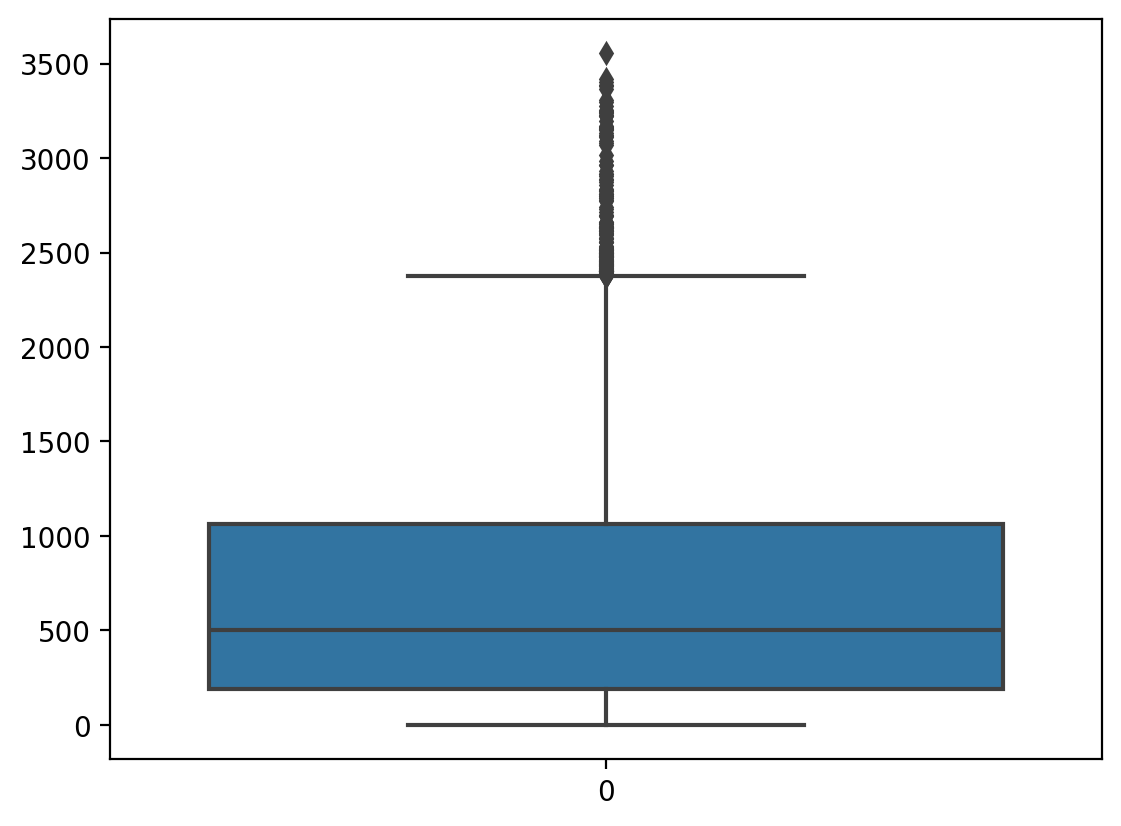

In [137]:
sns.boxplot(df.Rented_Bike_Count)

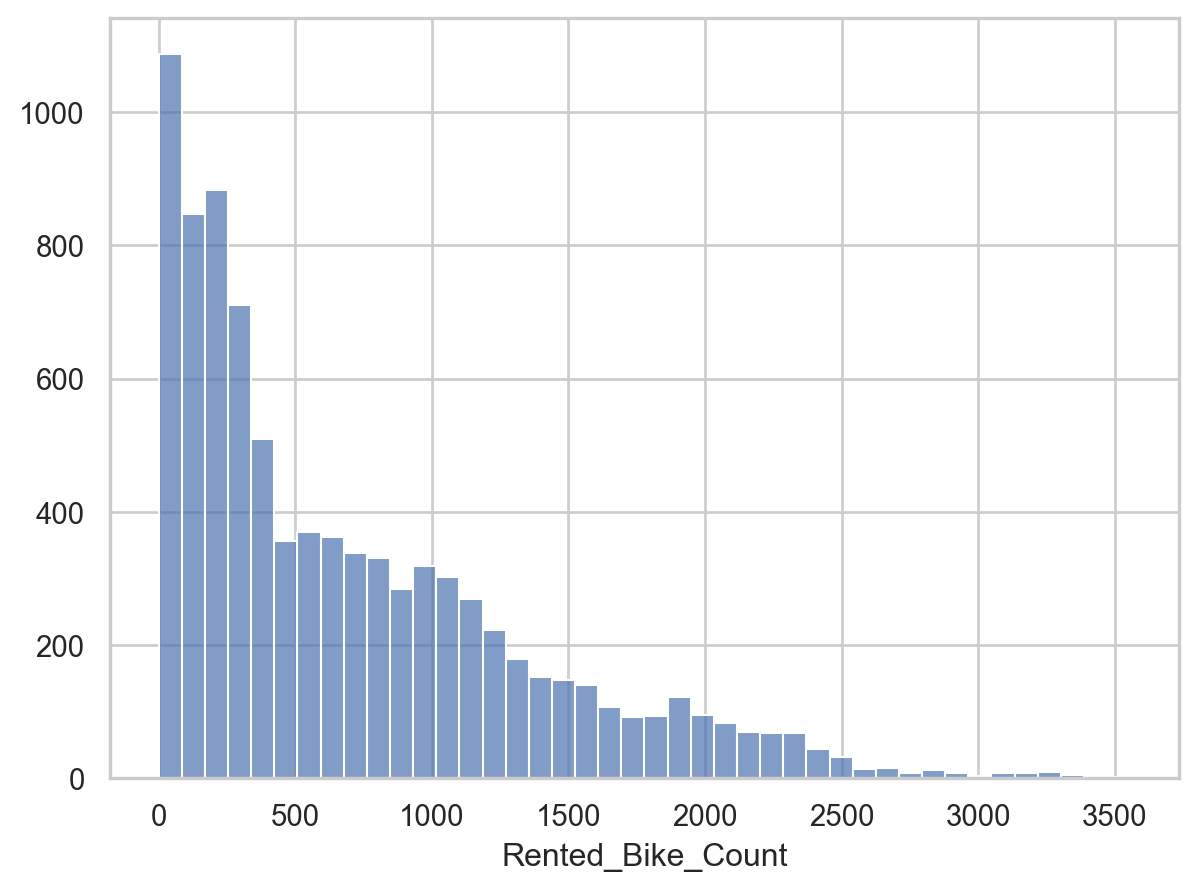

In [150]:
(
    so.Plot(df, x='Rented_Bike_Count')
    .add(so.Bars(), so.Hist())
    .theme({**sns.axes_style("whitegrid")})
)

<Axes: >

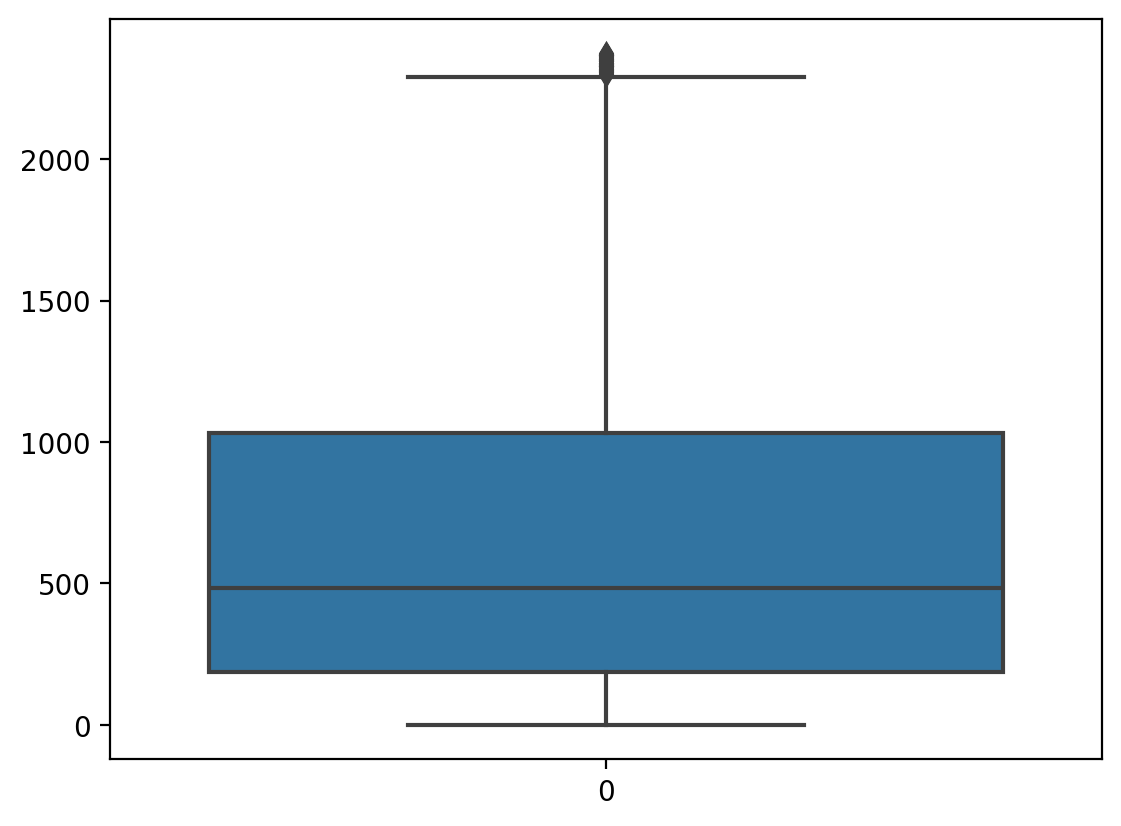

In [151]:
Q1 = df.Rented_Bike_Count.quantile(0.25)
Q3 = df.Rented_Bike_Count.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df2=df[(df.Rented_Bike_Count<upper_bound)&(df.Rented_Bike_Count>lower_bound)]

sns.boxplot(df2.Rented_Bike_Count)

# 이상치
## 2. Wind_speed

In [152]:
df.Wind_speed.describe()

count    7884.000000
mean        1.727220
std         1.036138
min         0.000000
25%         0.900000
50%         1.500000
75%         2.300000
max         7.400000
Name: Wind_speed, dtype: float64

In [174]:
df[df.Wind_speed==7.4] #풍속이 가장 높은 날

,Unnamed__0,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
3134,3134,10/04/2018,913,14,21.2,35,7.4,1992,5.1,1.8,0.0,0.0,Spring,No Holiday,Yes


<Axes: >

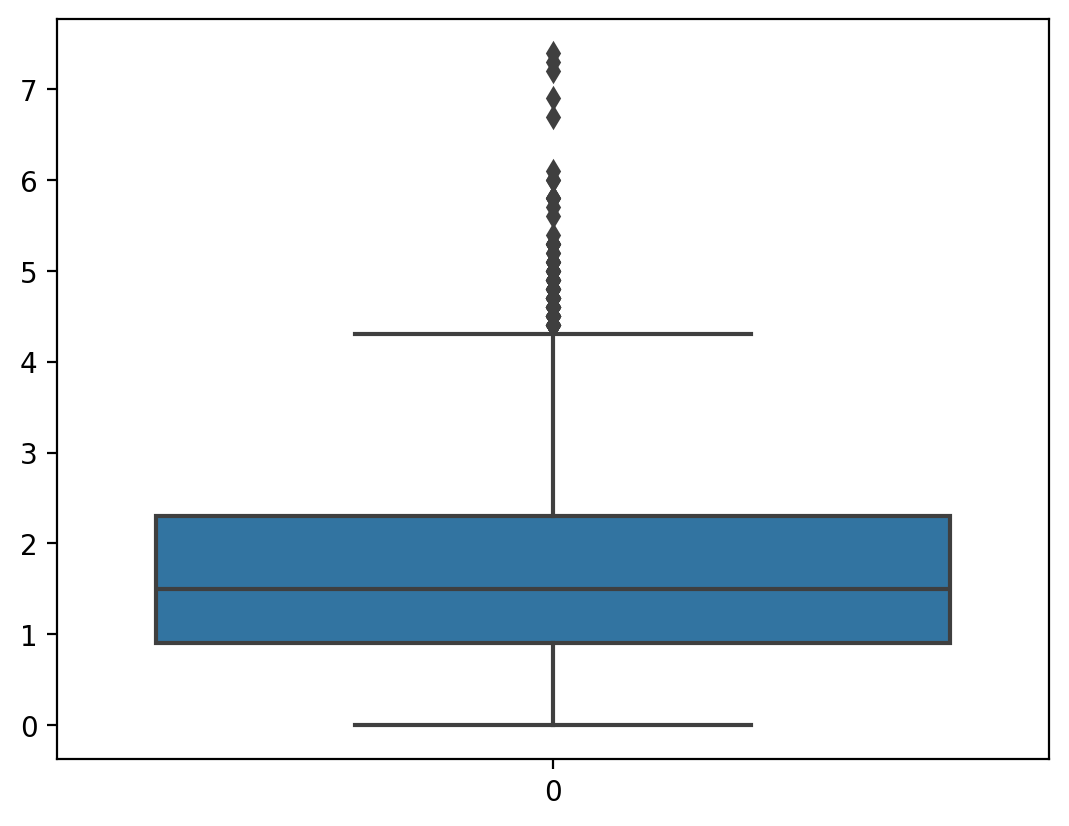

In [141]:
sns.boxplot(df.Wind_speed)

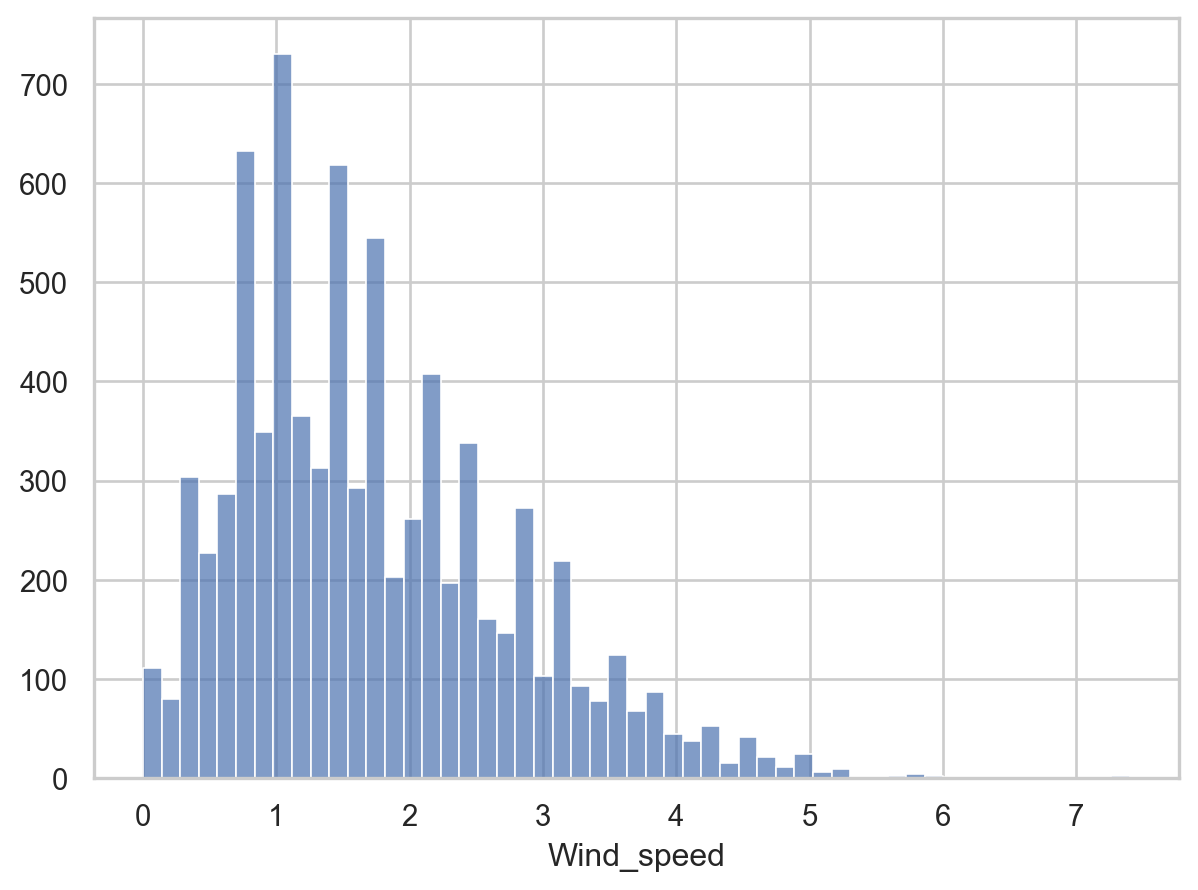

In [153]:
(
    so.Plot(df, x='Wind_speed')
    .add(so.Bars(), so.Hist())
    .theme({**sns.axes_style("whitegrid")})
)

<Axes: >

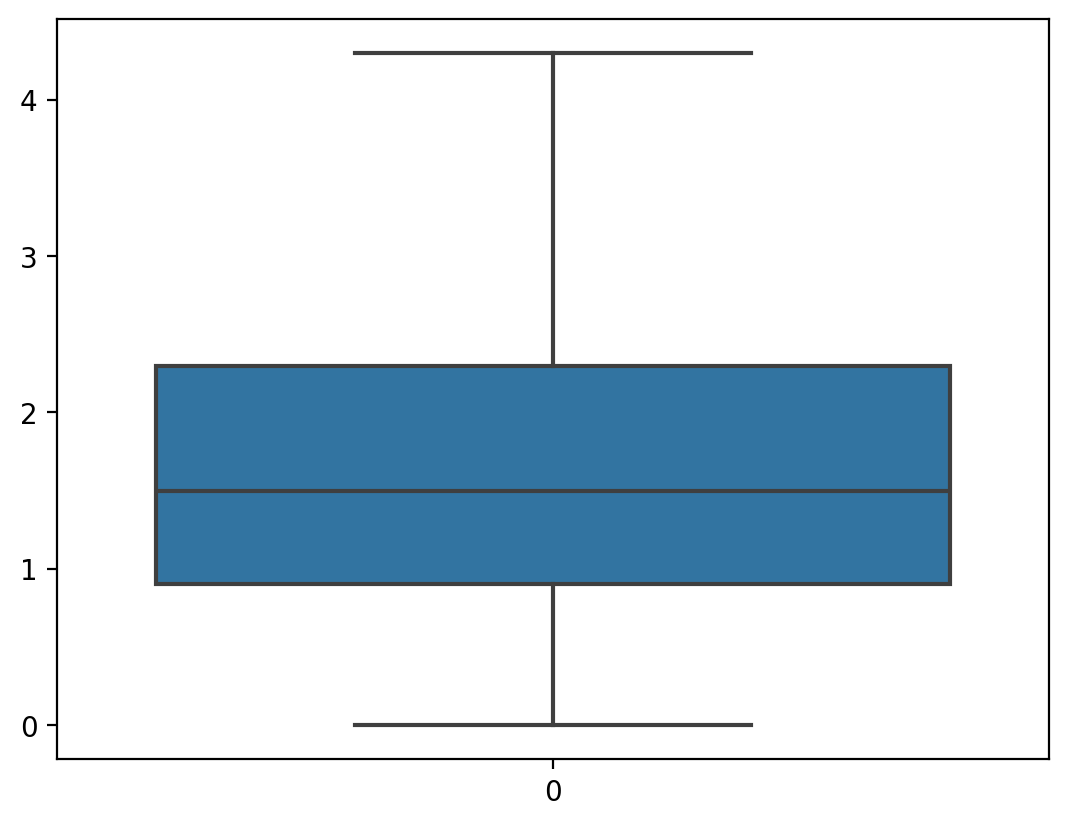

In [154]:
Q1 = df.Wind_speed.quantile(0.25)
Q3 = df.Wind_speed.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df2=df[(df.Wind_speed<upper_bound)&(df.Wind_speed>lower_bound)]
# 이상치 제거 확인
sns.boxplot(df2.Wind_speed)

# 이상치
## 3. Solar_Radiation

In [155]:
df.Solar_Radiation.describe()

count    8760.000000
mean        0.569111
std         0.868746
min         0.000000
25%         0.000000
50%         0.010000
75%         0.930000
max         3.520000
Name: Solar_Radiation, dtype: float64

In [175]:
df[df.Solar_Radiation==3.52] #태양복사에너지가 가장 높은 날 > 하지경에 가장 높은 태양복사에너지

,Unnamed__0,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
4069,4069,19/05/2018,1865,13,21.9,39,2.0,2000,7.3,3.52,0.0,0.0,Spring,No Holiday,Yes
4165,4165,23/05/2018,1167,13,20.9,33,3.9,1853,4.0,3.52,0.0,0.0,Spring,No Holiday,Yes


<Axes: >

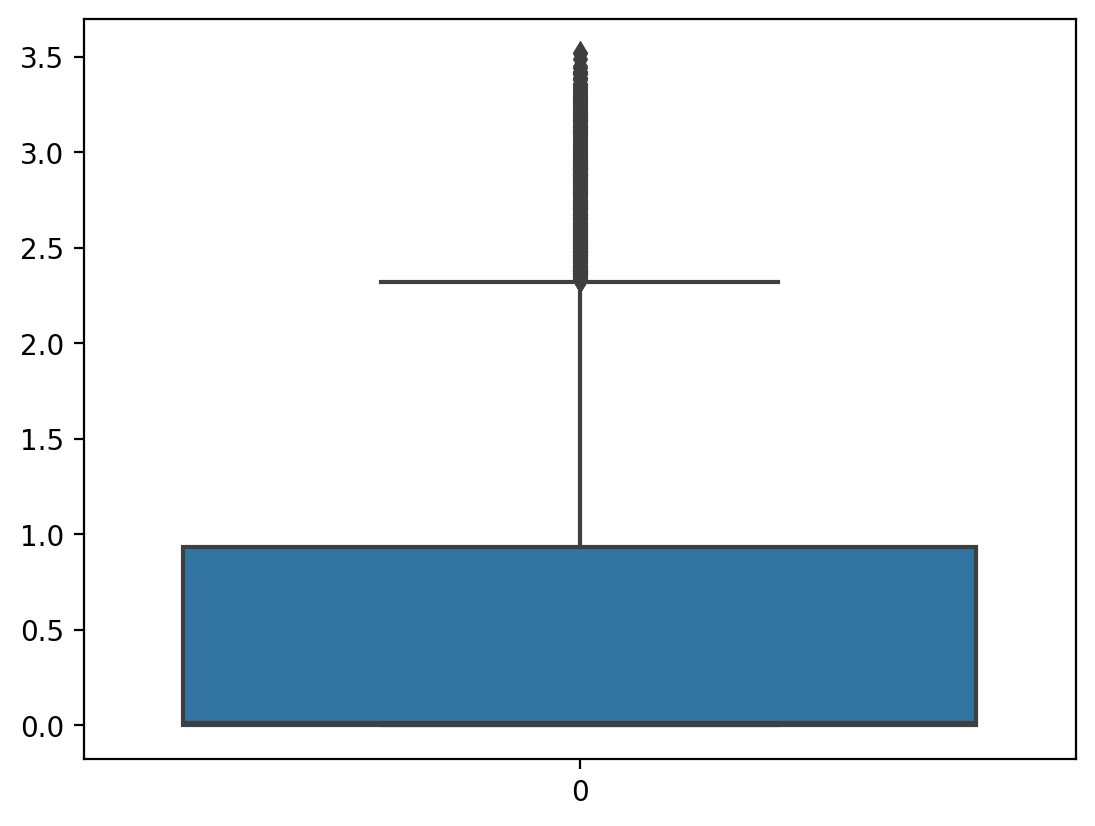

In [144]:
sns.boxplot(df.Solar_Radiation)

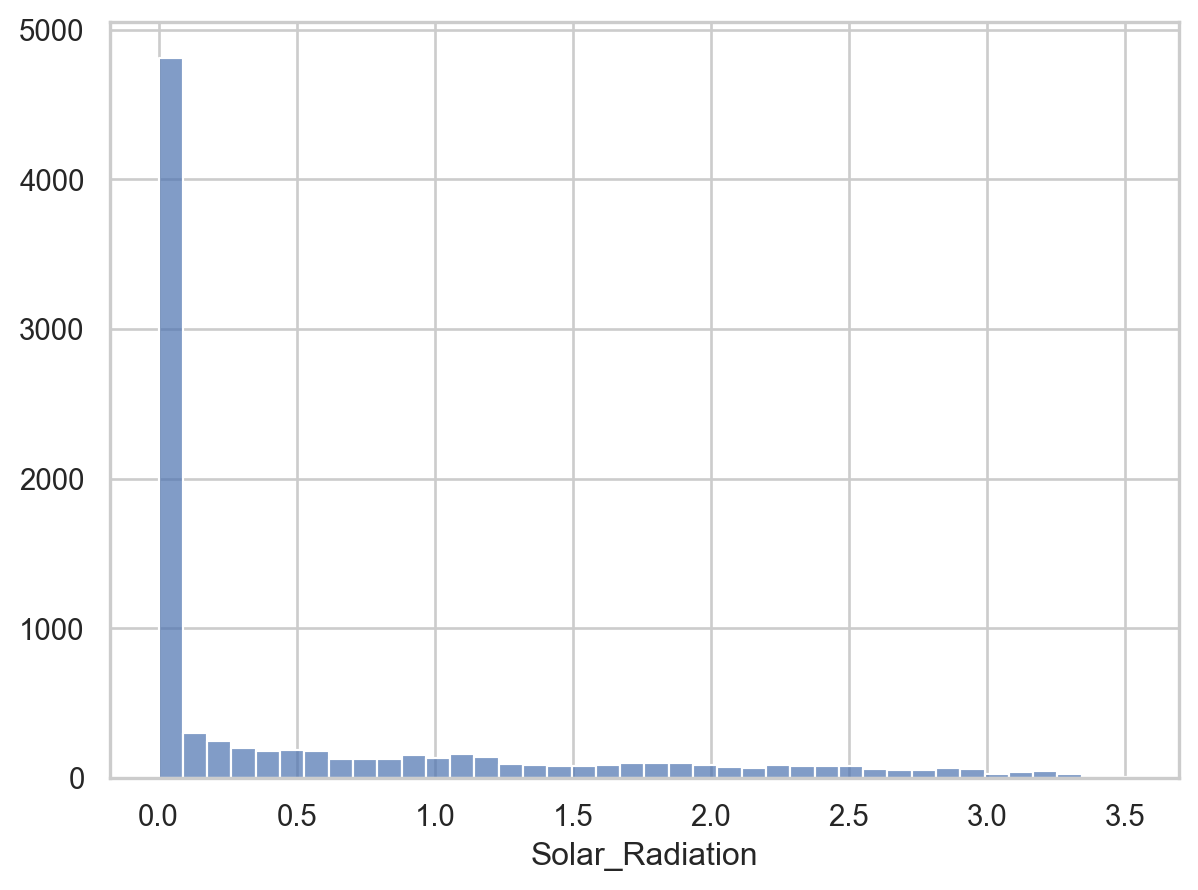

In [156]:
(
    so.Plot(df, x='Solar_Radiation')
    .add(so.Bars(), so.Hist())
    .theme({**sns.axes_style("whitegrid")})
)

<Axes: >

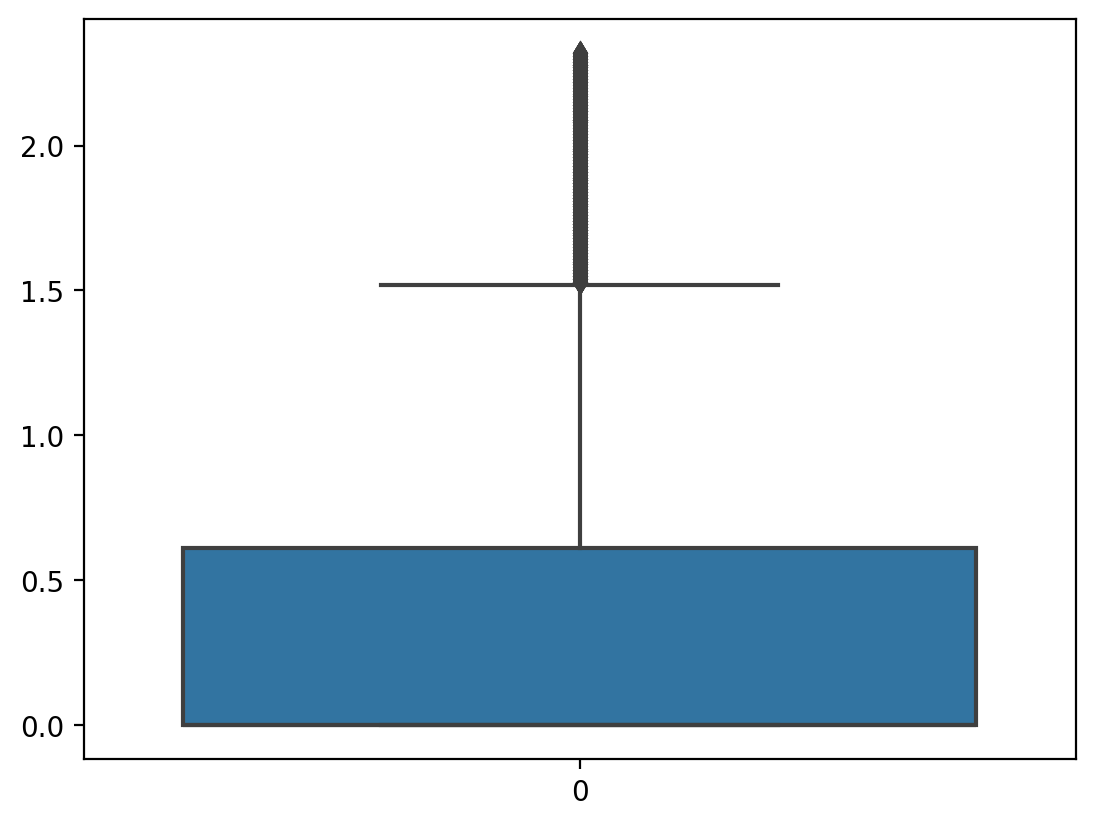

In [163]:
Q1 = df.Solar_Radiation.quantile(0.25)
Q3 = df.Solar_Radiation.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df2=df[(df.Solar_Radiation<upper_bound)&(df.Solar_Radiation>lower_bound)]

sns.boxplot(df2.Solar_Radiation)

In [161]:
np.log(df2['Solar_Radiation'])

0      -inf
1      -inf
2      -inf
3      -inf
5      -inf
       ... 
8755   -inf
8756   -inf
8757   -inf
8758   -inf
8759   -inf
Name: Solar_Radiation, Length: 7742, dtype: float64

# 이상치
## 4. Rainfall

In [164]:
df.Rainfall.describe()

count    8760.000000
mean        0.148687
std         1.128193
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        35.000000
Name: Rainfall, dtype: float64

In [176]:
df[df.Rainfall==35] #강우량이 가장 높은 날

,Unnamed__0,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
3997,3997,16/05/2018,151,13,21.8,97,2.4,682,21.2,0.06,35.0,0.0,Spring,No Holiday,Yes


<Axes: >

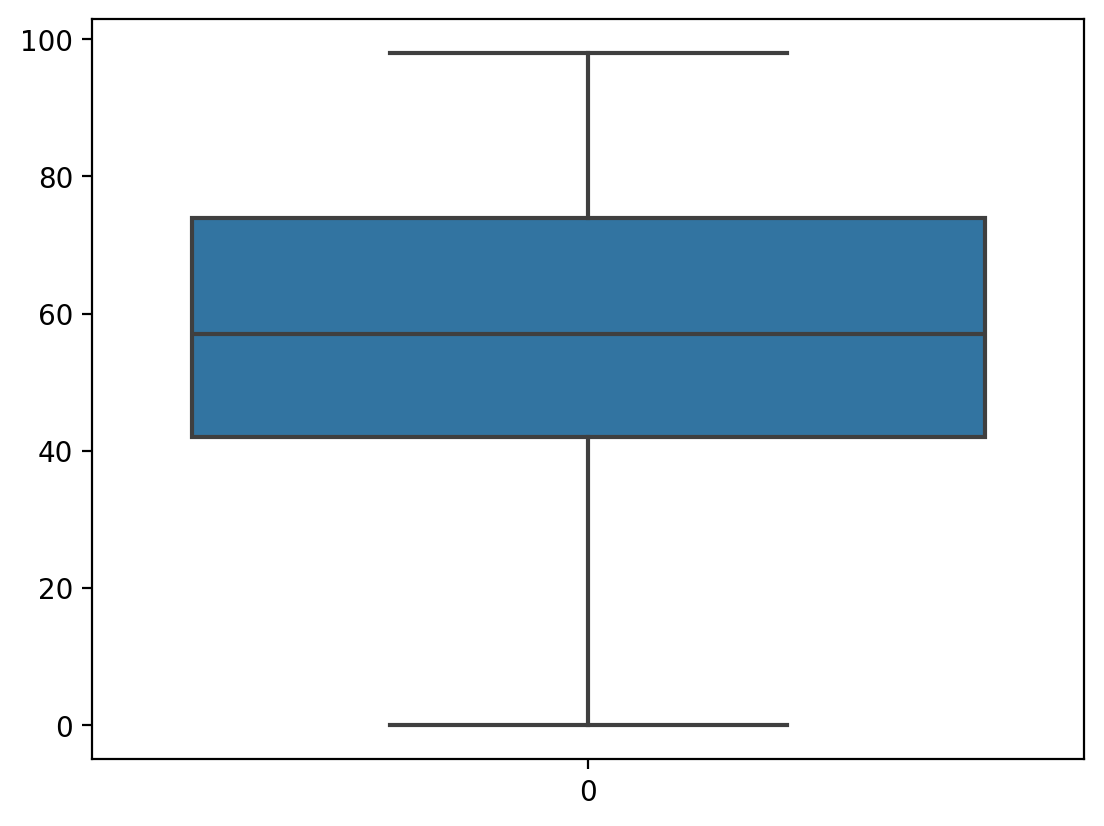

In [177]:
sns.boxplot(df.Humidity) 
#강우량이 가장 높은 날(=35)의 습도가 97로, 상당히 높은 편에 속한다고 볼 수 있음.

<Axes: >

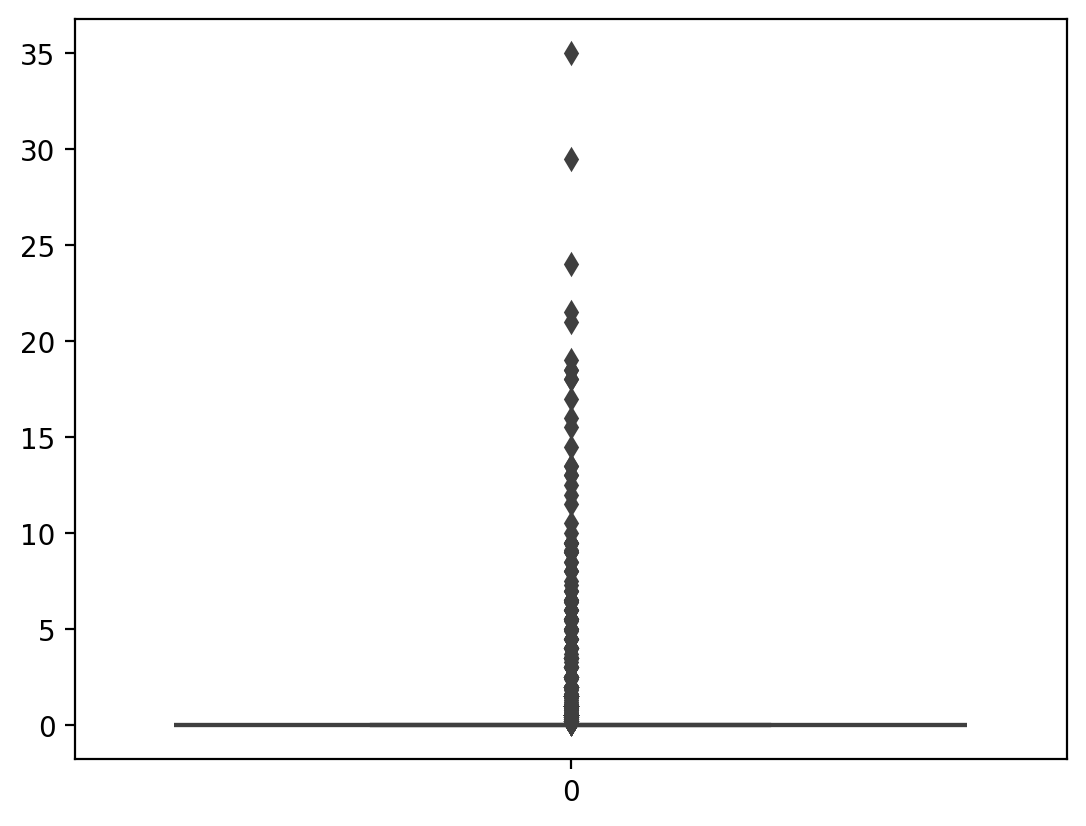

In [145]:
sns.boxplot(df.Rainfall)

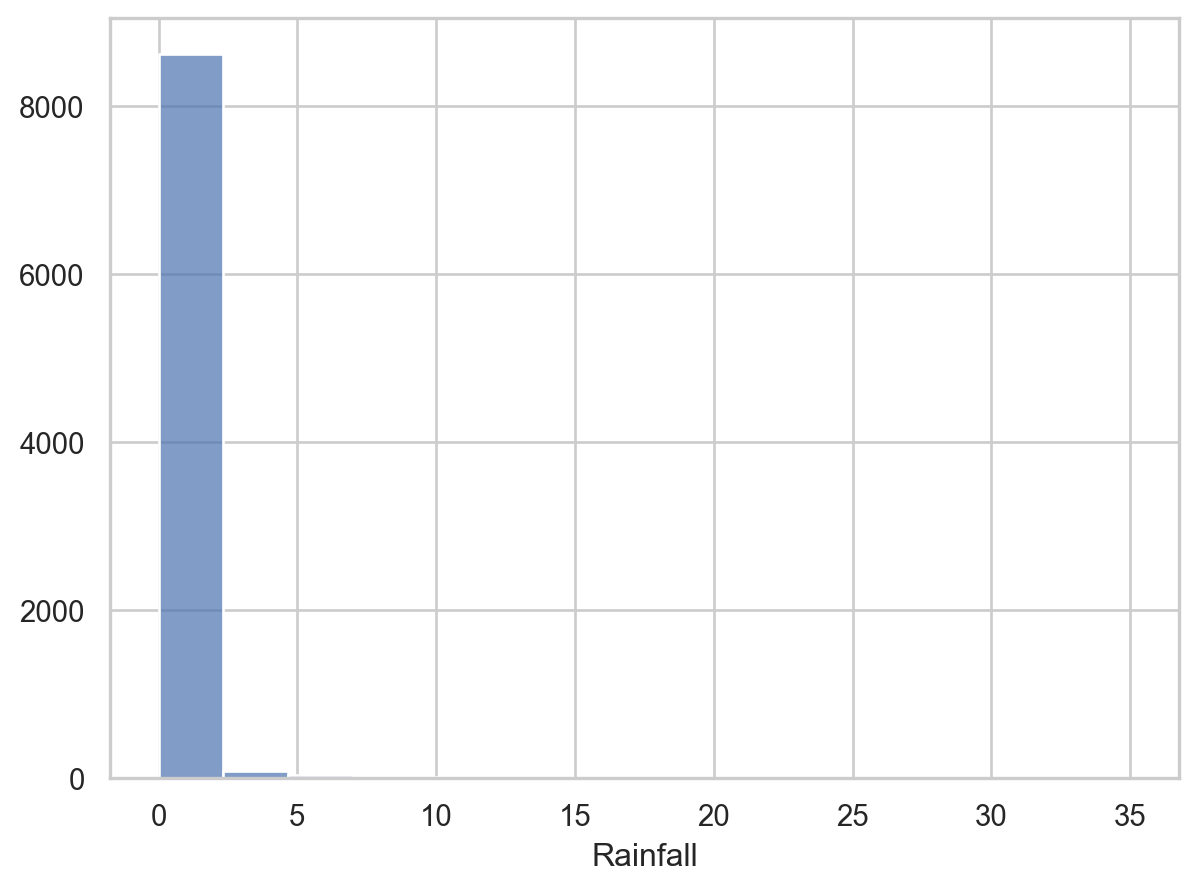

In [165]:
(
    so.Plot(df, x='Rainfall')
    .add(so.Bars(), so.Hist())
    .theme({**sns.axes_style("whitegrid")})
)

In [171]:
np.log(df2['Rainfall'])

0      -inf
1      -inf
2      -inf
3      -inf
4      -inf
       ... 
8755   -inf
8756   -inf
8757   -inf
8758   -inf
8759   -inf
Name: Rainfall, Length: 8119, dtype: float64

# 이상치
## 5. Snowfall

In [169]:
df.Snowfall.describe()

count    8760.000000
mean        0.075068
std         0.436746
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.800000
Name: Snowfall, dtype: float64

In [178]:
df[df.Snowfall==8.8] #적설량이 가장 높은 2일 모두 계절이 가을임을 알 수 있음 > 이상치가 아닐까? 추측

,Unnamed__0,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
8602,8602,24/11/2018,62,10,0.4,97,NaN,207,0.0,0.00,0.0,8.8,Autumn,No Holiday,Yes
8603,8603,24/11/2018,114,11,1.2,97,2.3,975,0.7,0.07,0.0,8.8,Autumn,No Holiday,Yes


<Axes: >

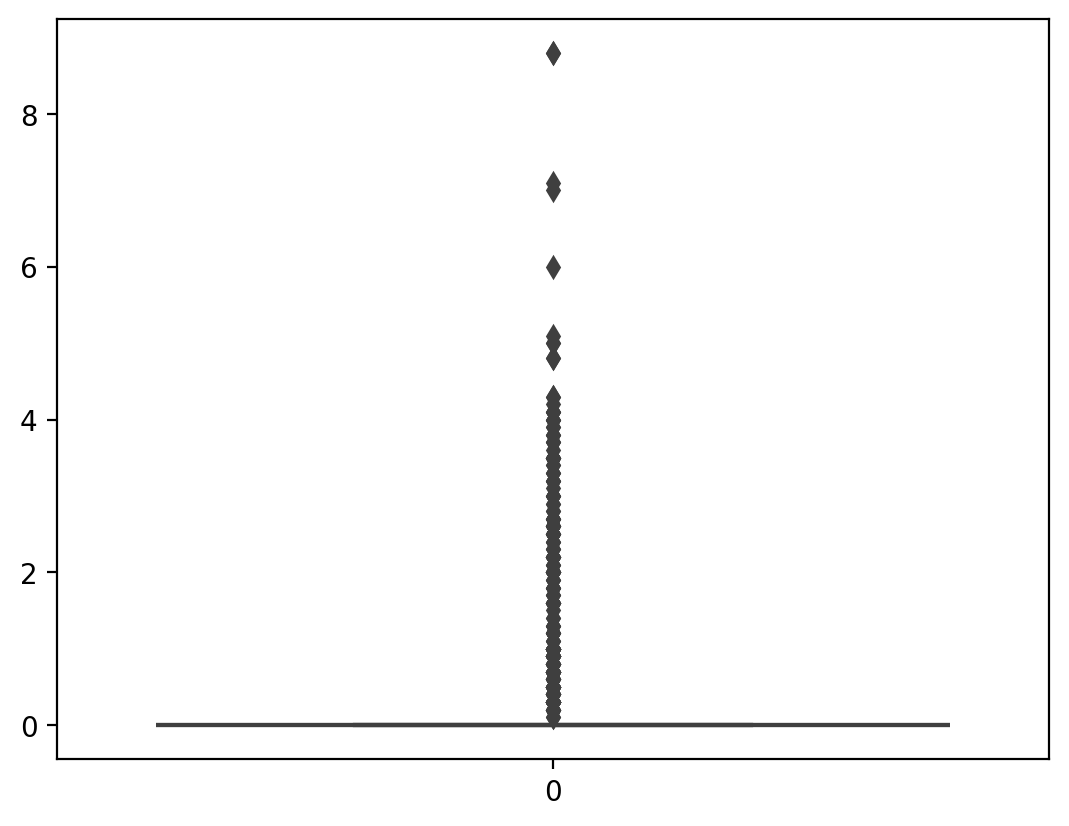

In [146]:
sns.boxplot(df.Snowfall)

(
    so.Plot(df, x='Snowfall')
    .add(so.Bars(), so.Hist())
    .theme({**sns.axes_style("whitegrid")})
)

In [172]:
np.log(df2['Snowfall'])

0      -inf
1      -inf
2      -inf
3      -inf
4      -inf
       ... 
8755   -inf
8756   -inf
8757   -inf
8758   -inf
8759   -inf
Name: Snowfall, Length: 8119, dtype: float64

# 변수변환 & 파생변수

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed__0             8760 non-null   int64  
 1   Date                   8760 non-null   object 
 2   Rented_Bike_Count      8760 non-null   int64  
 3   Hour                   8760 non-null   int64  
 4   Temperature            7884 non-null   float64
 5   Humidity               8760 non-null   int64  
 6   Wind_speed             7884 non-null   float64
 7   Visibility             8760 non-null   int64  
 8   Dew_point_temperature  8760 non-null   float64
 9   Solar_Radiation        8760 non-null   float64
 10  Rainfall               8760 non-null   float64
 11  Snowfall               8760 non-null   float64
 12  Seasons                8760 non-null   object 
 13  Holiday                8760 non-null   object 
 14  Functioning_Day        8760 non-null   object 
dtypes: f

##### Hour, Seasons, Holiday, Functioning_Day 변수를 category 변수로 변환

In [181]:
df.Hour=df.Hour.astype('category')
df.Hour.astype('category')

0        0
1        1
2        2
3        3
4        4
        ..
8755    19
8756    20
8757    21
8758    22
8759    23
Name: Hour, Length: 8760, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [182]:
df.Seasons=df.Seasons.astype('category')
df.Seasons.astype('category')

0       Winter
1       Winter
2       Winter
3       Winter
4       Winter
         ...  
8755    Autumn
8756    Autumn
8757    Autumn
8758    Autumn
8759    Autumn
Name: Seasons, Length: 8760, dtype: category
Categories (4, object): ['Autumn', 'Spring', 'Summer', 'Winter']

In [183]:
df.Holiday=df.Holiday.astype('category')
df.Holiday.astype('category')

0       No Holiday
1       No Holiday
2       No Holiday
3       No Holiday
4       No Holiday
           ...    
8755    No Holiday
8756    No Holiday
8757    No Holiday
8758    No Holiday
8759    No Holiday
Name: Holiday, Length: 8760, dtype: category
Categories (2, object): ['Holiday', 'No Holiday']

In [184]:
df.Functioning_Day=df.Functioning_Day.astype('category')
df.Functioning_Day.astype('category')

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
8755    Yes
8756    Yes
8757    Yes
8758    Yes
8759    Yes
Name: Functioning_Day, Length: 8760, dtype: category
Categories (2, object): ['No', 'Yes']

In [185]:
df.info() #변수 변환 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Unnamed__0             8760 non-null   int64   
 1   Date                   8760 non-null   object  
 2   Rented_Bike_Count      8760 non-null   int64   
 3   Hour                   8760 non-null   category
 4   Temperature            7884 non-null   float64 
 5   Humidity               8760 non-null   int64   
 6   Wind_speed             7884 non-null   float64 
 7   Visibility             8760 non-null   int64   
 8   Dew_point_temperature  8760 non-null   float64 
 9   Solar_Radiation        8760 non-null   float64 
 10  Rainfall               8760 non-null   float64 
 11  Snowfall               8760 non-null   float64 
 12  Seasons                8760 non-null   category
 13  Holiday                8760 non-null   category
 14  Functioning_Day        8760 non-null   c

##### Object 변수를 datetime 자료형 변수로 변환

In [201]:
df['Date']

0       01/12/2017
1       01/12/2017
2       01/12/2017
3       01/12/2017
4       01/12/2017
           ...    
8755    30/11/2018
8756    30/11/2018
8757    30/11/2018
8758    30/11/2018
8759    30/11/2018
Name: Date, Length: 8760, dtype: object

In [207]:
df['Date']=pd.to_datetime(df['Date'],format='%d/%m/%Y') #datetime 자료형으로 변환

In [221]:
df.Date.info() #변환 확인

<class 'pandas.core.series.Series'>
RangeIndex: 8760 entries, 0 to 8759
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
8760 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 68.6 KB


In [314]:
#df = df.drop('Unnamed__0',axis = 1)
df

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [223]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [224]:
df.tail()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [230]:
df3 = df._get_numeric_data()
df3

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [233]:
df3.corr()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
Rented_Bike_Count,1.000000,0.537229,-0.199780,0.116558,0.199280,0.379788,0.261837,-0.123074,-0.141804
Temperature,0.537229,1.000000,0.156094,-0.034464,0.039581,0.912099,0.356539,0.050215,-0.221321
Humidity,-0.199780,0.156094,1.000000,-0.336105,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,0.116558,-0.034464,-0.336105,1.000000,0.170671,-0.178011,0.331239,-0.019080,-0.001319
Visibility,0.199280,0.039581,-0.543090,0.170671,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,0.379788,0.912099,0.536894,-0.178011,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation,0.261837,0.356539,-0.461919,0.331239,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,-0.123074,0.050215,0.236397,-0.019080,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,-0.141804,-0.221321,0.108183,-0.001319,-0.121695,-0.150887,-0.072301,0.008500,1.000000


In [236]:
import seaborn as sns
import matplotlib.pyplot as plt # seaborn figure 크기 조절을 위해서

Text(0.5, 1.0, 'correlation heatmap')

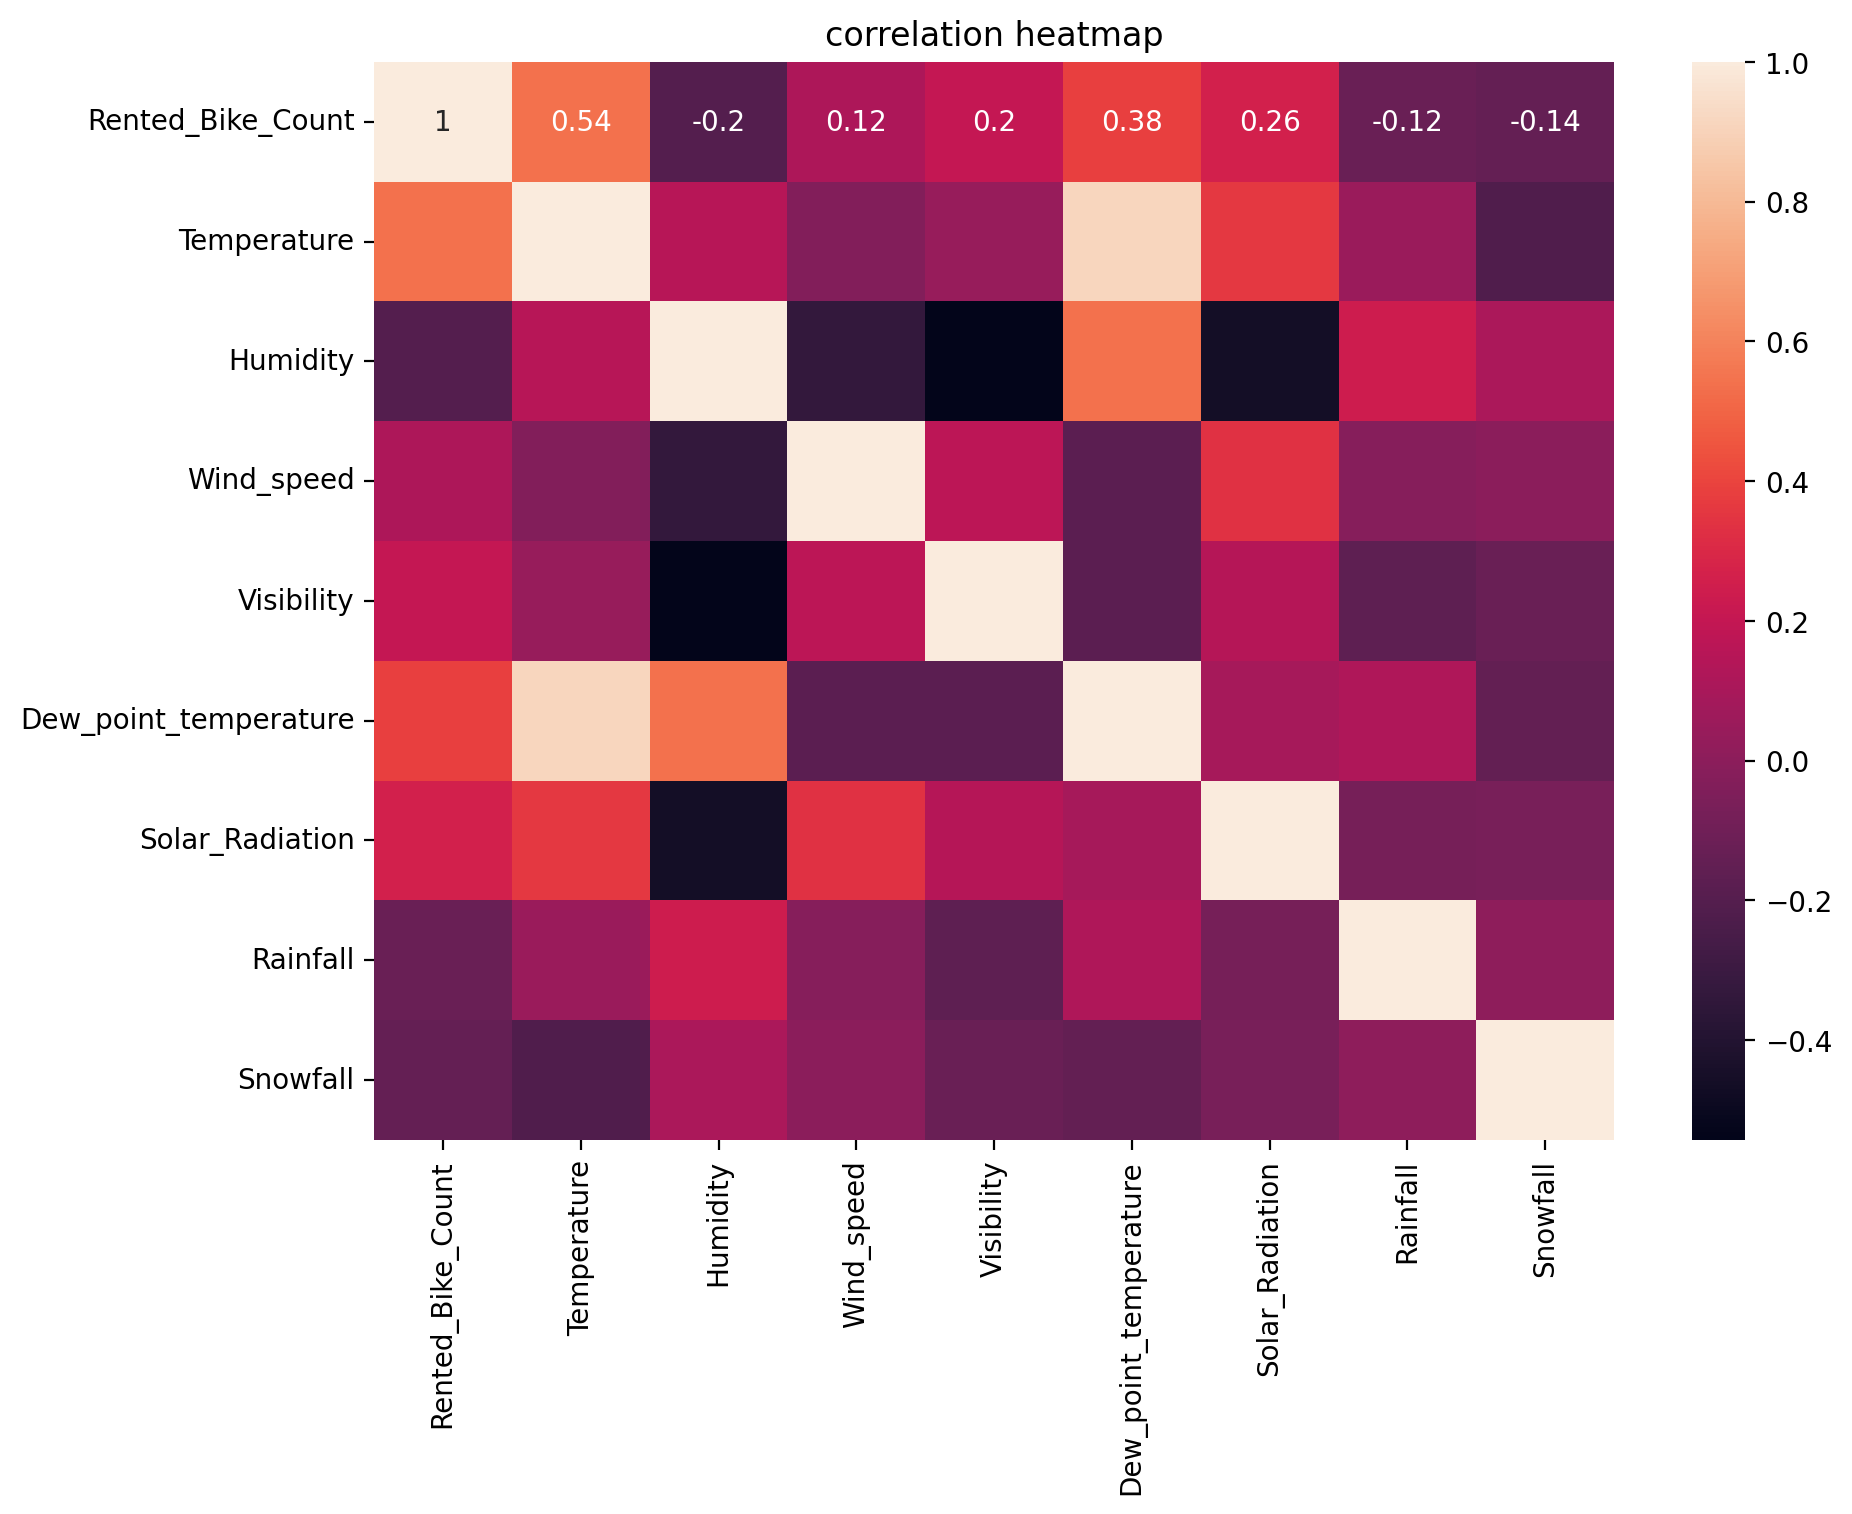

In [243]:
plt.figure(figsize=(10,7))
sns.heatmap(df3.corr(), annot=True)
plt.title('correlation heatmap') #상관계수 행렬 히트맵
#왜 수치가 다 보이지 않는지?

<Axes: xlabel='Seasons', ylabel='Rented_Bike_Count'>

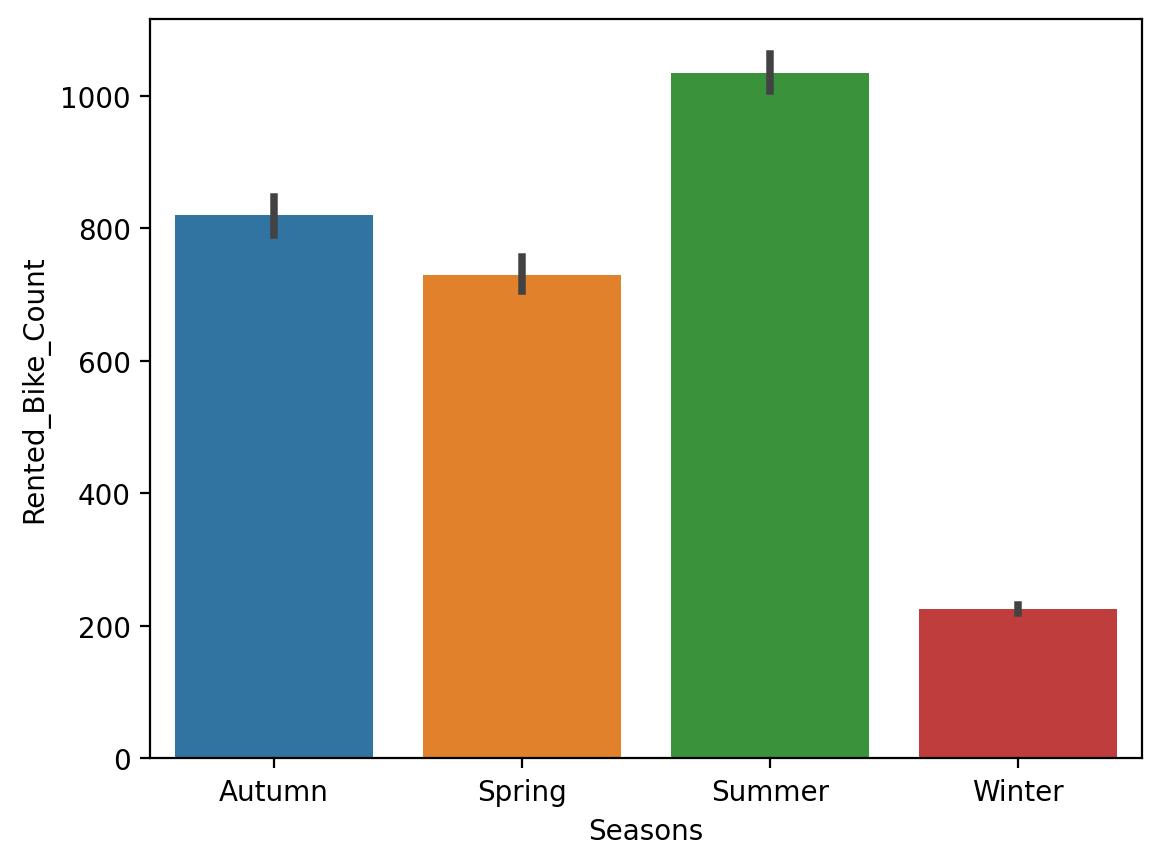

In [256]:
sns.barplot(x='Seasons', y=df.Rented_Bike_Count, data=df)

<Axes: xlabel='Temperature', ylabel='Rented_Bike_Count'>

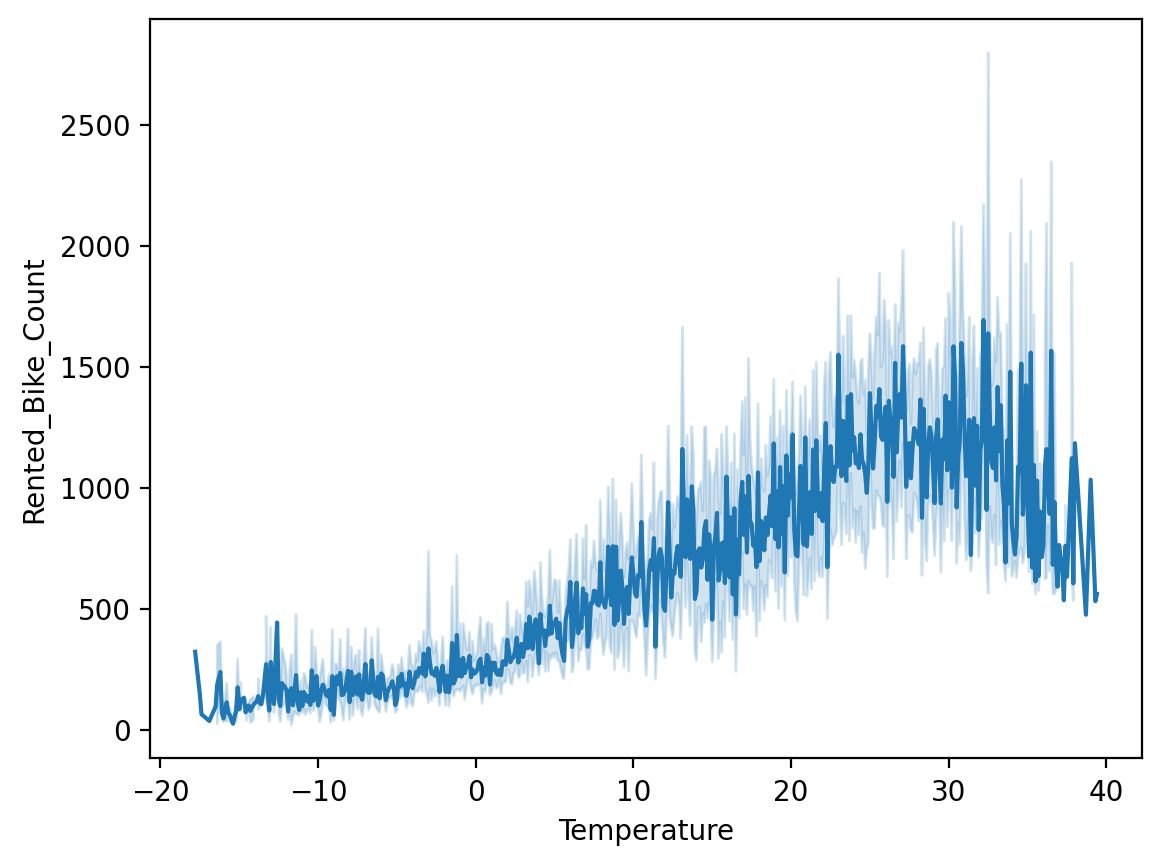

In [258]:
sns.lineplot(x='Temperature', y=df.Rented_Bike_Count, data=df)

<Axes: xlabel='Temperature', ylabel='Seasons'>

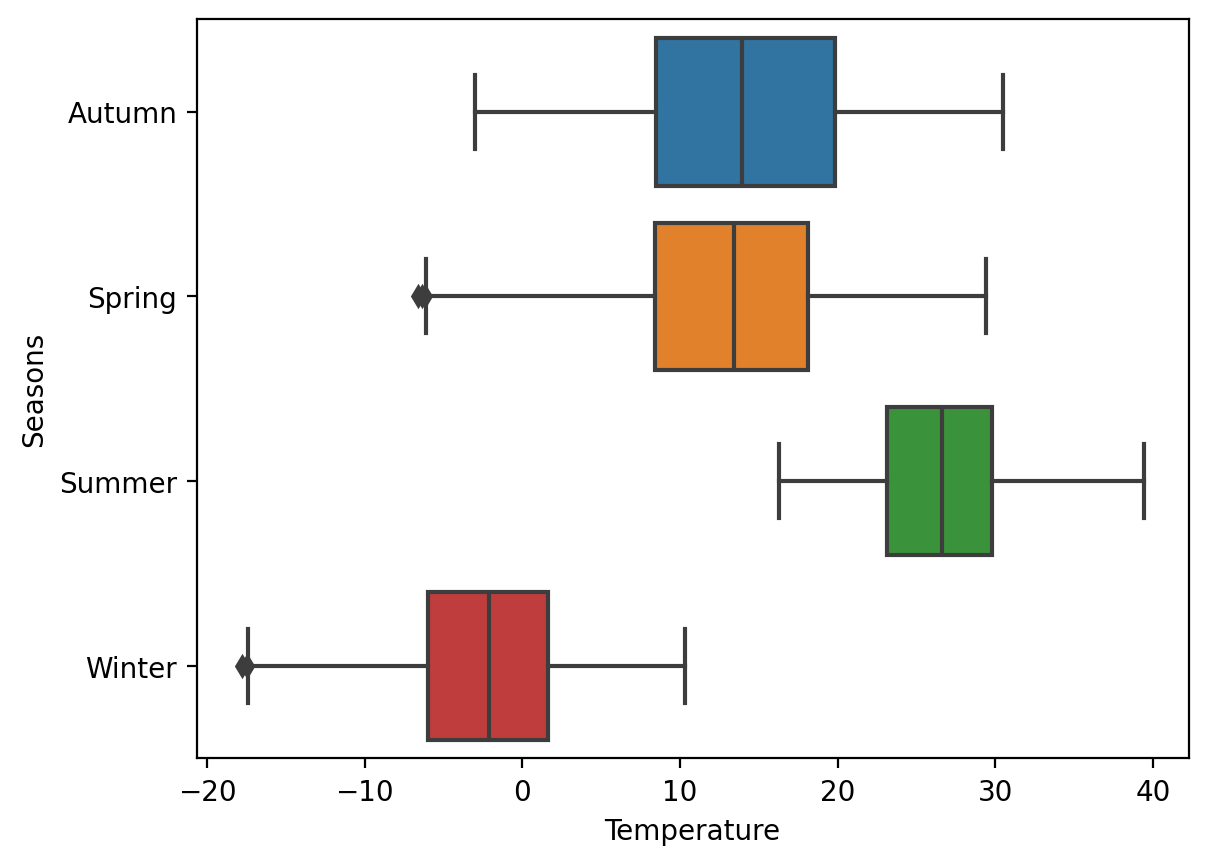

In [262]:
# 기온(Temperature)과 계절(Seasons)의 관계
sns.boxplot(x=df.Temperature, y=df.Seasons)

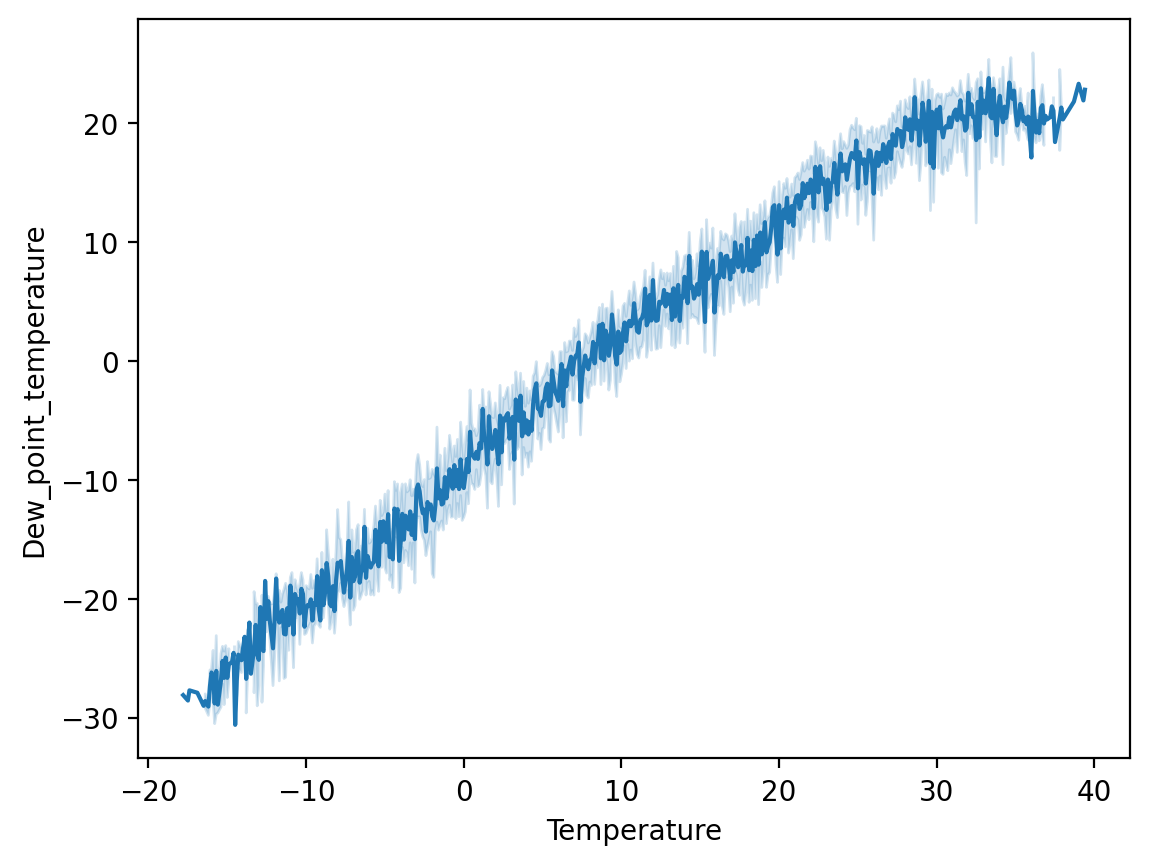

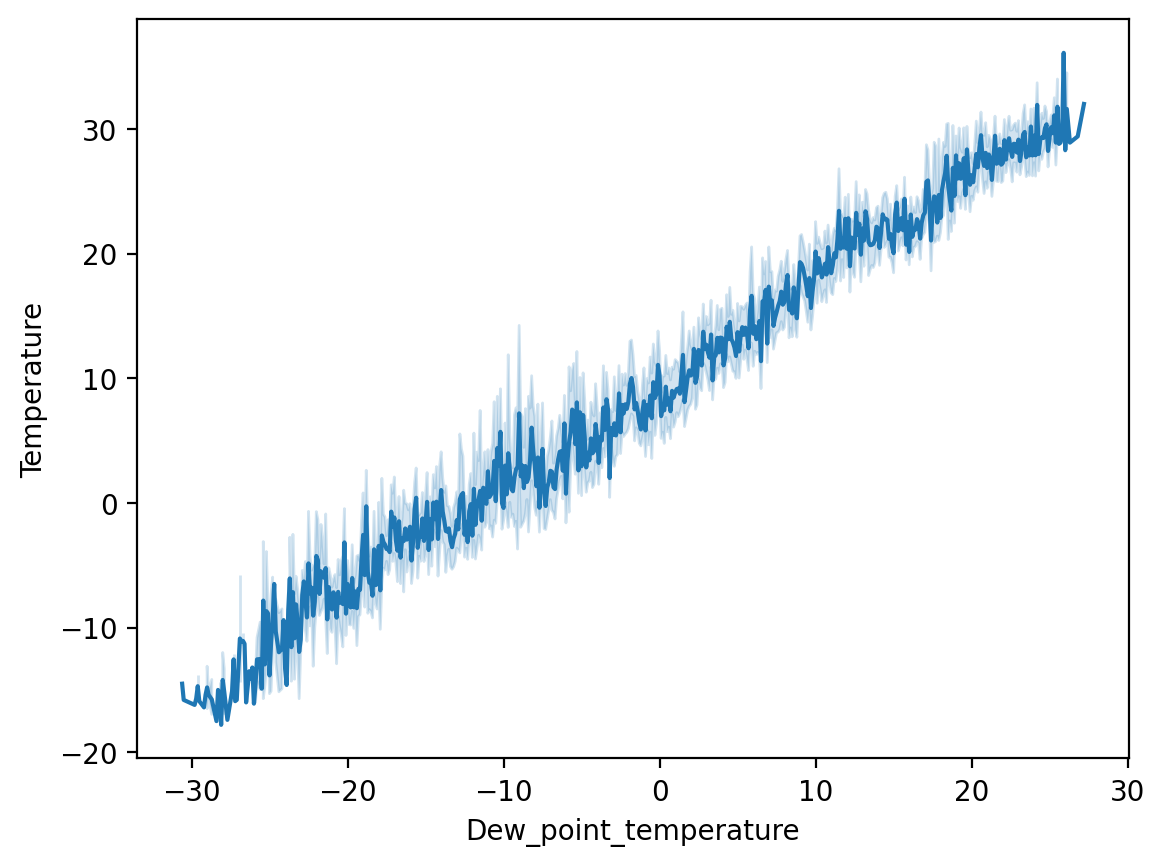

In [318]:
# 기온(Temperature)과 이슬점 온도(Dew point temperature)의 관계
sns.lineplot(x=df.Temperature, y=df.Dew_point_temperature)
plt.show()

print(df.groupby('Temperature')['Dew_point_temperature'])
sns.lineplot(x=df.Dew_point_temperature, y=df.Temperature)
plt.show()

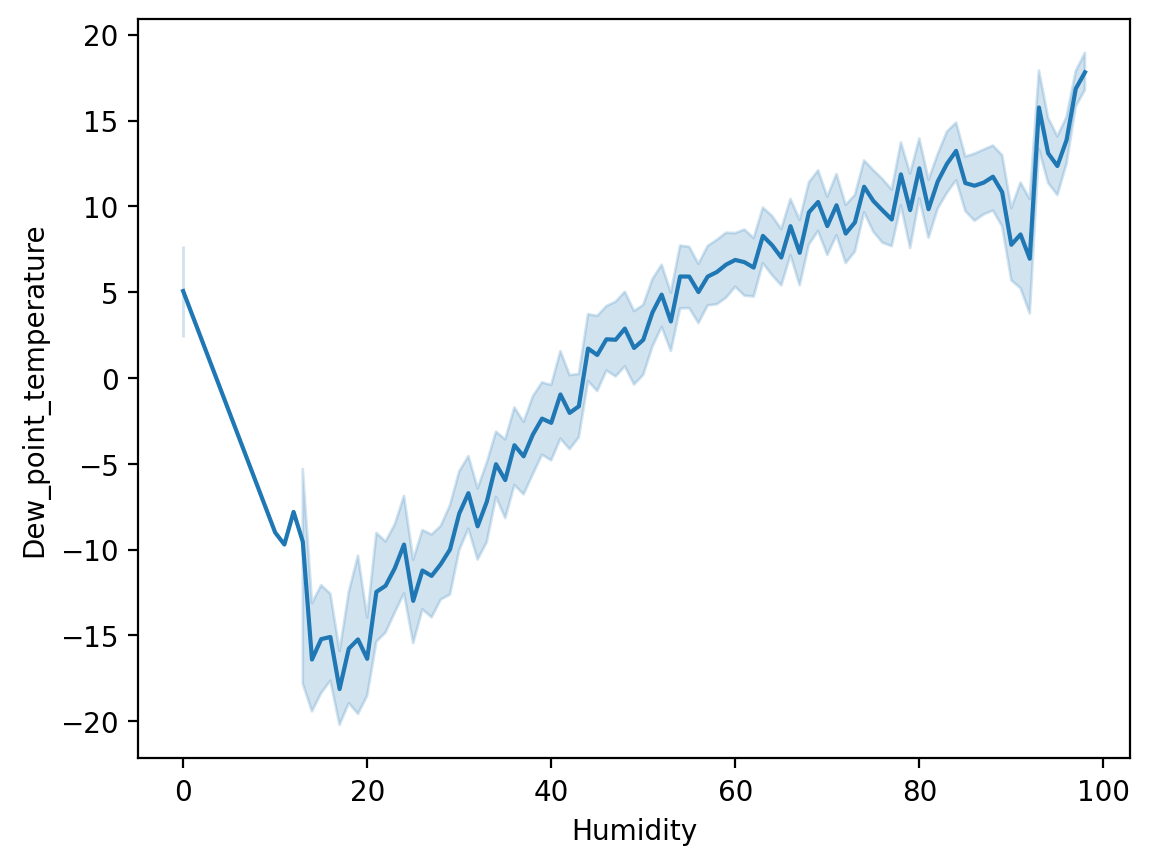

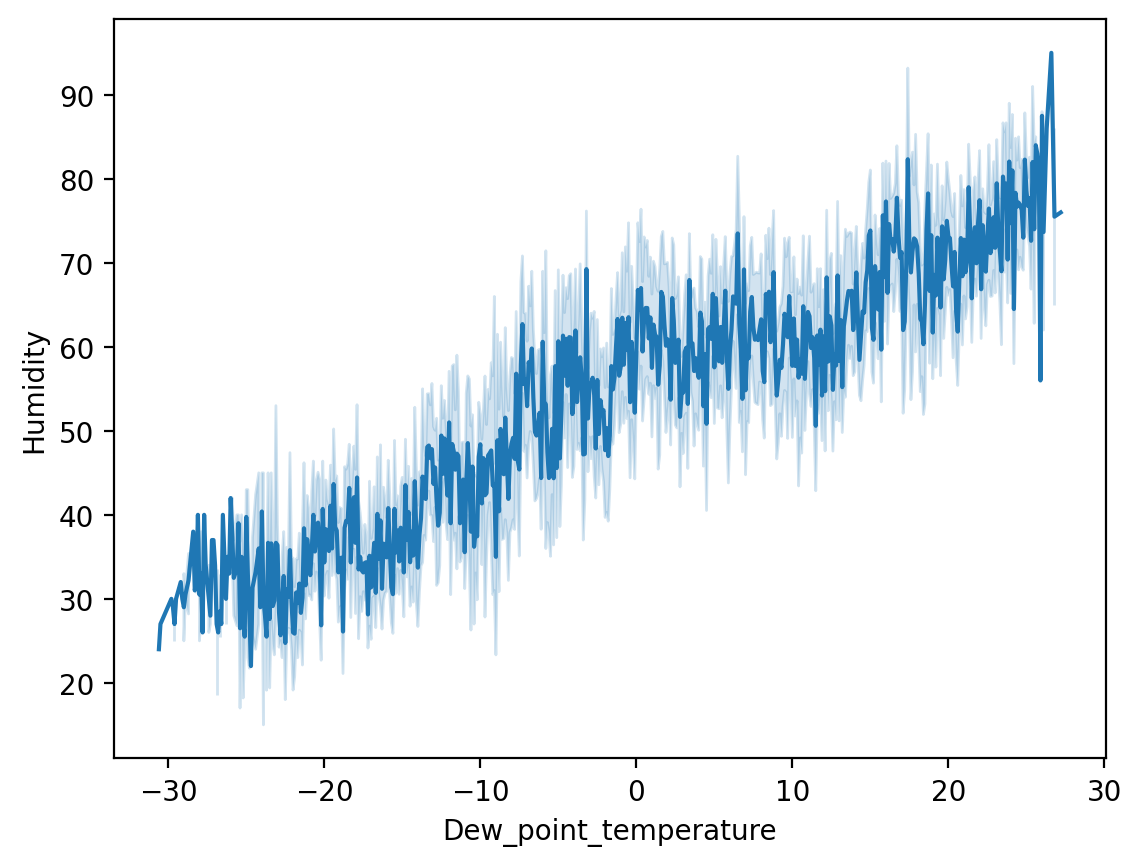

In [319]:
# 습도(Humidity)과 이슬점 온도(Dew point temperature)의 관계
sns.lineplot(x=df.Humidity, y=df.Dew_point_temperature)
plt.show()

print(df.groupby('Humidity')['Dew_point_temperature'])
sns.lineplot(x=df.Dew_point_temperature, y=df.Humidity)
plt.show()

Temperature  Rented_Bike_Count
13.2         0                    5
11.4         0                    5
19.0         0                    5
16.7         0                    5
10.8         0                    5
                                 ..
6.9          312                  1
             304                  1
             189                  1
             159                  1
39.4         561                  1
Name: count, Length: 7700, dtype: int64


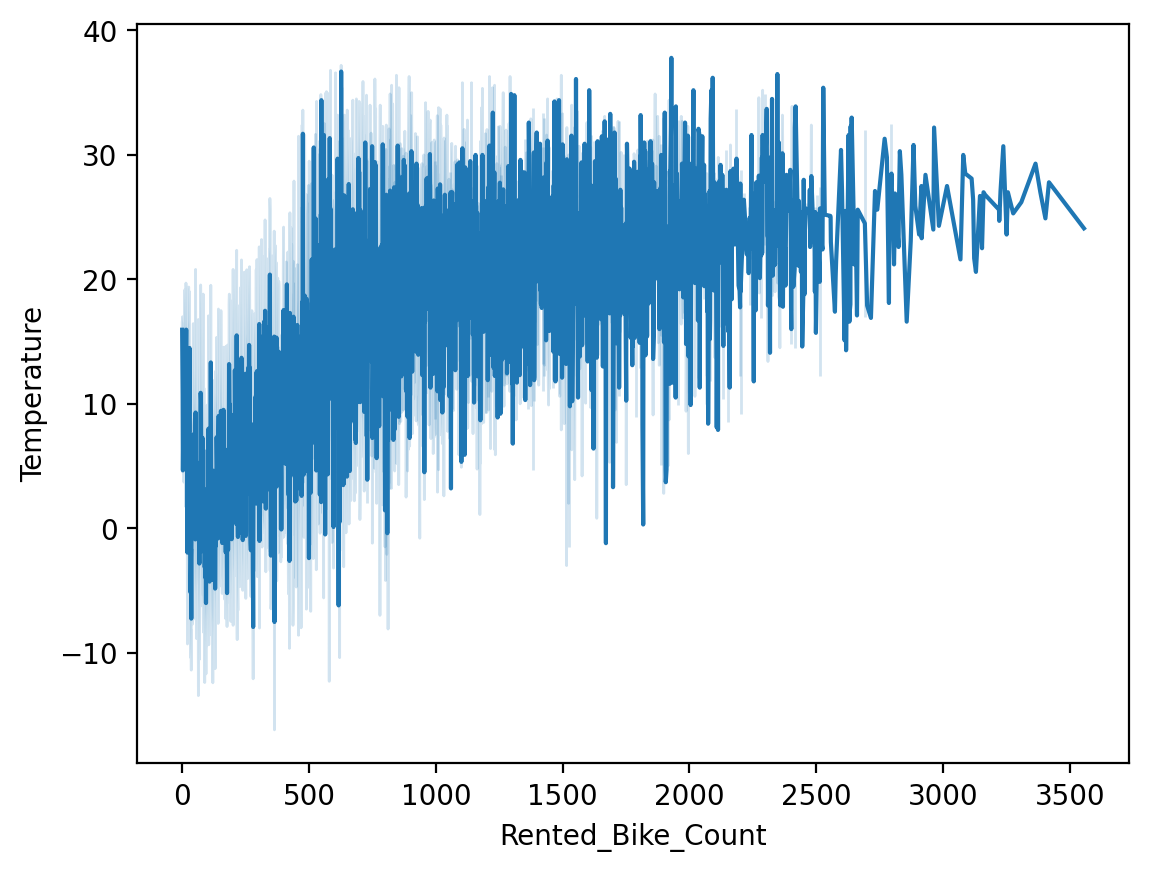

In [272]:
# 기온(Temperature)이 대여 따릉이 수(Rented Bike Count)와 관련이 있는지
print(df[['Temperature','Rented_Bike_Count']].value_counts())
print(df.groupby('Temperature')['Rented_Bike_Count'])
sns.lineplot(x=df.Rented_Bike_Count, y=df.Temperature)
plt.show()

In [280]:
sum(df.Functioning_Day=='No') 
# 운영하지 않는 날 : 295일
# Functioning_Day=='No'인 날은 따릉이 대여량 0

295

In [321]:
df[df.Functioning_Day=='No']

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
3144,2018-04-11,0,0,NaN,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No
3145,2018-04-11,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No
3146,2018-04-11,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No
3147,2018-04-11,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No
3148,2018-04-11,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,2018-11-09,0,19,11.9,71,2.7,589,6.7,0.0,0.0,0.0,Autumn,No Holiday,No
8252,2018-11-09,0,20,11.9,72,2.5,526,7.0,0.0,0.0,0.0,Autumn,No Holiday,No
8253,2018-11-09,0,21,11.4,74,1.9,498,6.9,0.0,0.0,0.0,Autumn,No Holiday,No
8254,2018-11-09,0,22,11.2,75,NaN,478,6.9,0.0,0.0,0.0,Autumn,No Holiday,No


In [292]:
list(df[df.Functioning_Day=='No']['Date'].unique()) #운영하지 않는 날

[Timestamp('2018-04-11 00:00:00'),
 Timestamp('2018-05-10 00:00:00'),
 Timestamp('2018-09-18 00:00:00'),
 Timestamp('2018-09-19 00:00:00'),
 Timestamp('2018-09-28 00:00:00'),
 Timestamp('2018-09-30 00:00:00'),
 Timestamp('2018-10-02 00:00:00'),
 Timestamp('2018-10-04 00:00:00'),
 Timestamp('2018-10-06 00:00:00'),
 Timestamp('2018-10-09 00:00:00'),
 Timestamp('2018-11-03 00:00:00'),
 Timestamp('2018-11-06 00:00:00'),
 Timestamp('2018-11-09 00:00:00')]

In [297]:
list(df[df.Functioning_Day=='No']['Visibility'].unique())

[1041,
 886,
 885,
 687,
 554,
 447,
 442,
 438,
 519,
 975,
 1487,
 1468,
 1132,
 1558,
 1804,
 1938,
 2000,
 1923,
 1969,
 1960,
 1895,
 1698,
 1351,
 974,
 876,
 1211,
 1318,
 1235,
 1015,
 1320,
 1078,
 1142,
 946,
 1154,
 1075,
 790,
 675,
 520,
 460,
 452,
 369,
 1916,
 1912,
 1866,
 1906,
 1658,
 1757,
 1729,
 1501,
 1205,
 1619,
 1678,
 1809,
 1704,
 1749,
 1785,
 1953,
 1997,
 1999,
 1782,
 1488,
 1650,
 1534,
 1774,
 1819,
 1723,
 1560,
 1840,
 1836,
 1594,
 1883,
 1691,
 1737,
 1057,
 1989,
 1995,
 1939,
 1847,
 1679,
 1195,
 1665,
 1954,
 1987,
 1992,
 1843,
 1236,
 1778,
 1798,
 1956,
 1714,
 1427,
 1554,
 1878,
 1776,
 1913,
 1929,
 1994,
 1792,
 1857,
 1900,
 1780,
 1821,
 1980,
 1963,
 1990,
 1744,
 1814,
 1601,
 1577,
 360,
 417,
 1991,
 1838,
 1998,
 1314,
 1273,
 1170,
 1229,
 1104,
 1053,
 983,
 894,
 905,
 1033,
 957,
 890,
 1060,
 1328,
 1724,
 1605,
 772,
 990,
 740,
 592,
 619,
 791,
 1064,
 700,
 668,
 500,
 493,
 420,
 409,
 422,
 529,
 578,
 521,
 488,
 373,


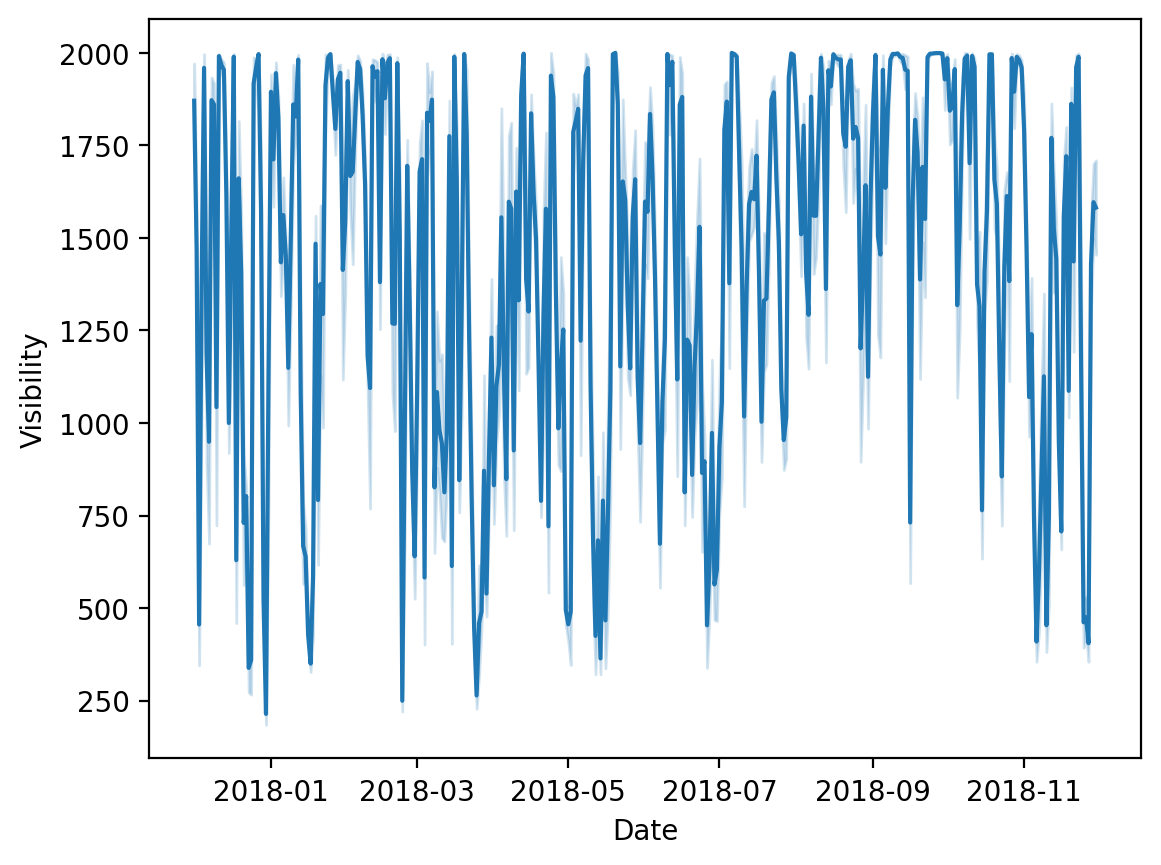

In [304]:
sns.lineplot(x=df.Date,y=df.Visibility)
plt.show()

In [308]:
list(df[df.Functioning_Day=='No']['Seasons'].unique())

['Spring', 'Autumn']

In [309]:
list(df[df.Functioning_Day=='No']['Holiday'].unique())

['No Holiday', 'Holiday']